#### TIME SERIES FORECASTING ON CRYPTOCURRENCY DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Crypto(currency) 2018-2023.csv')

In [ ]:
df.head()

Type      Date     Open     High       Low     Close  Adj Close  \
0  Tether USD  1/1/2018  1.01255  1.01536  1.001530  1.007280   1.007280   
1  Tether USD  1/2/2018  1.00574  1.00988  0.993250  1.004900   1.004900   
2  Tether USD  1/3/2018  1.00660  1.02328  1.002640  1.013440   1.013440   
3  Tether USD  1/4/2018  1.01320  1.01618  0.993822  1.002530   1.002530   
4  Tether USD  1/5/2018  1.00175  1.00501  0.985915  0.998634   0.998634   

         Volume  
0  1.685300e+09  
1  2.635860e+09  
2  2.471690e+09  
3  3.200130e+09  
4  3.096620e+09

In [ ]:
df.tail()

Type        Date      Open      High       Low     Close  Adj Close  \
19769  GBP/USD  12/26/2022  1.206001  1.209614  1.205400  1.206001   1.206001   
19770  GBP/USD  12/27/2022  1.208357  1.211226  1.200336  1.208415   1.208415   
19771  GBP/USD  12/28/2022  1.202776  1.212415  1.200336  1.202733   1.202733   
19772  GBP/USD  12/29/2022  1.203297  1.207584  1.201548  1.202848   1.202848   
19773  GBP/USD  12/30/2022  1.205662  1.210683  1.201273  1.205633   1.205633   

       Volume  
19769     0.0  
19770     0.0  
19771     0.0  
19772     0.0  
19773     0.0

In [ ]:
df.describe()

Open          High           Low         Close     Adj Close  \
count  19772.000000  19772.000000  19772.000000  19772.000000  19772.000000   
mean    2008.620978   2058.988085   1951.445422   2008.527097   2008.527097   
std     7815.585155   8012.914625   7589.346874   7814.360399   7814.360399   
min        0.001540      0.001612      0.001247      0.001537      0.001537   
25%        0.267351      0.277035      0.256446      0.266330      0.266330   
50%        1.189555      1.200321      1.181467      1.189328      1.189328   
75%      112.577722    116.367683    107.868156    112.482011    112.482011   
max    67549.734380  68789.625000  66382.062500  67566.828130  67566.828130   

             Volume  
count  1.977200e+04  
mean   8.495771e+09  
std    1.897170e+10  
min    0.000000e+00  
25%    1.537364e+08  
50%    1.196646e+09  
75%    5.499856e+09  
max    3.510000e+11

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19774 entries, 0 to 19773
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Type       19774 non-null  object 
 1   Date       19774 non-null  object 
 2   Open       19772 non-null  float64
 3   High       19772 non-null  float64
 4   Low        19772 non-null  float64
 5   Close      19772 non-null  float64
 6   Adj Close  19772 non-null  float64
 7   Volume     19772 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999695  0.999423  0.999223   0.999223  0.352518
High       0.999695  1.000000  0.999374  0.999651   0.999651  0.353946
Low        0.999423  0.999374  1.000000  0.999603   0.999603  0.349568
Close      0.999223  0.999651  0.999603  1.000000   1.000000  0.352029
Adj Close  0.999223  0.999651  0.999603  1.000000   1.000000  0.352029
Volume     0.352518  0.353946  0.349568  0.352029   0.352029  1.000000

In [ ]:
df.shape

(19774, 8)

In [ ]:
col1, col2 = "Close", "Adj Close"
correlation = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(correlation, 2))

Correlation between  Close  and  Adj Close is:  1.0


In [ ]:
df = df.drop(columns=['Adj Close'], axis=1)

In [ ]:
df['Type'].unique()

array(['Tether USD', 'Bitcoin USD', 'Ethereum USD', 'TRON USD', 'BNB USD',
       'XRP USD', 'Cardano USD', 'Dogecoin USD', 'Litecoin USD',
       'Polkadot USD', 'EUR/USD', 'GBP/USD'], dtype=object)

In [ ]:
df.isna().sum()

Type      0
Date      0
Open      2
High      2
Low       2
Close     2
Volume    2
dtype: int64

In [ ]:
df.fillna(method='bfill',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19774 entries, 0 to 19773
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    19774 non-null  object 
 1   Date    19774 non-null  object 
 2   Open    19774 non-null  float64
 3   High    19774 non-null  float64
 4   Low     19774 non-null  float64
 5   Close   19774 non-null  float64
 6   Volume  19774 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [ ]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [ ]:
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
df.columns

Index(['Type', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

<ipython-input-19-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


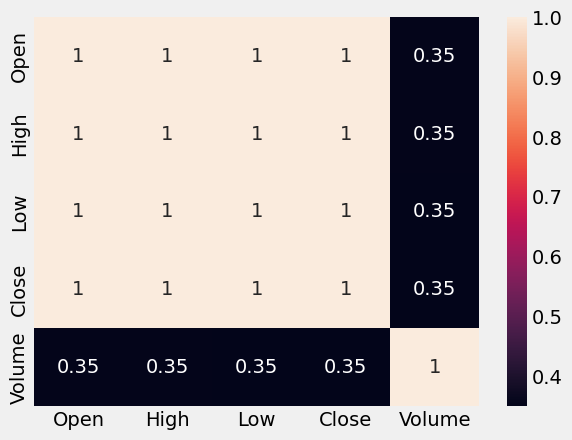

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

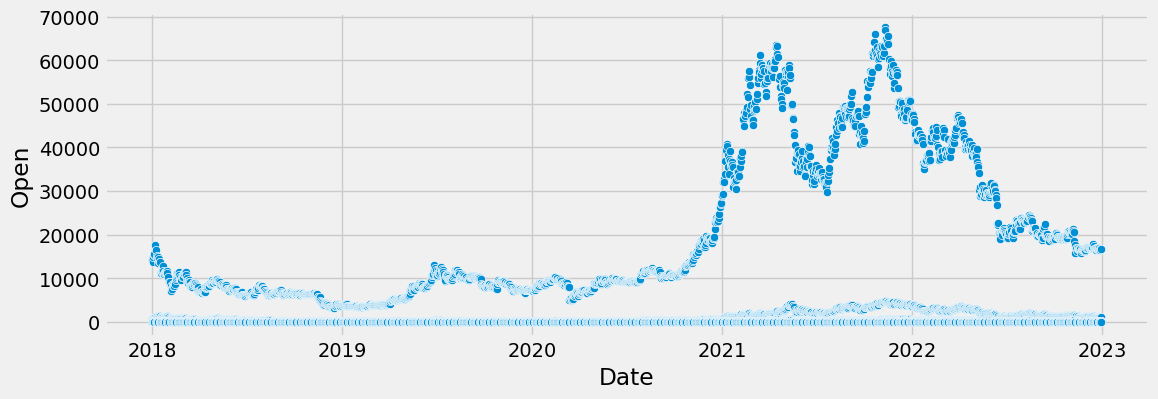

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x='Date', y='Open')
plt.show()

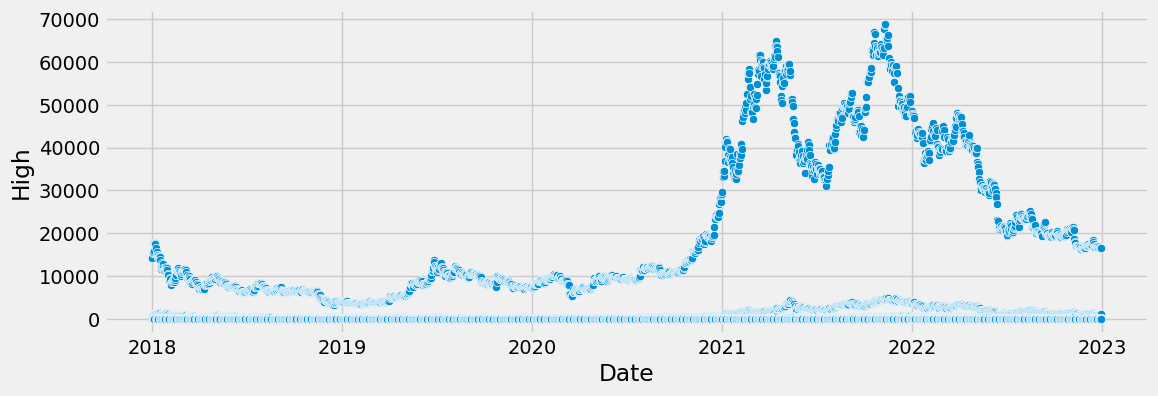

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x='Date', y='High')
plt.show()

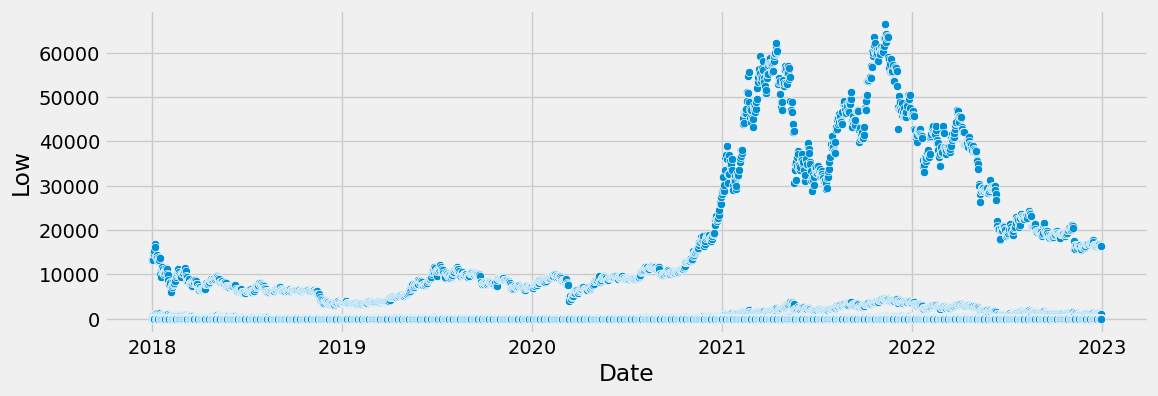

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x='Date', y='Low')
plt.show()

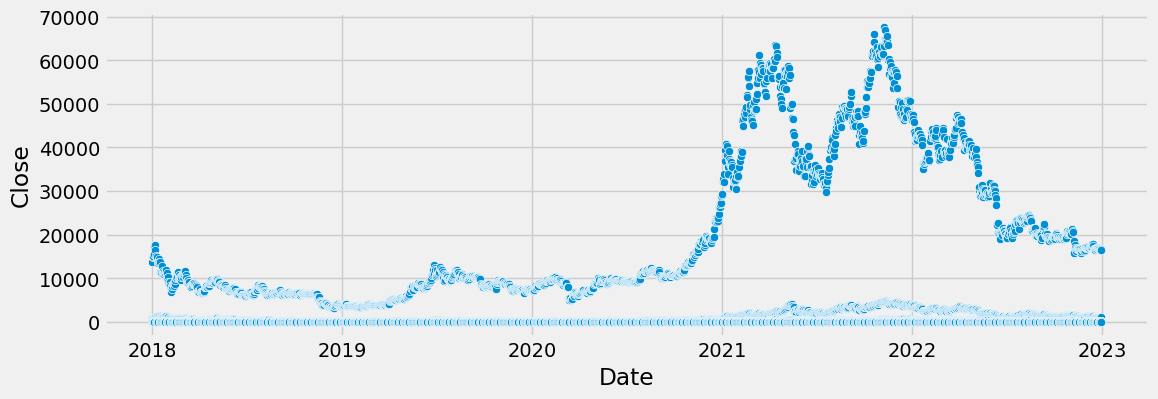

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x='Date', y='Close')
plt.show()

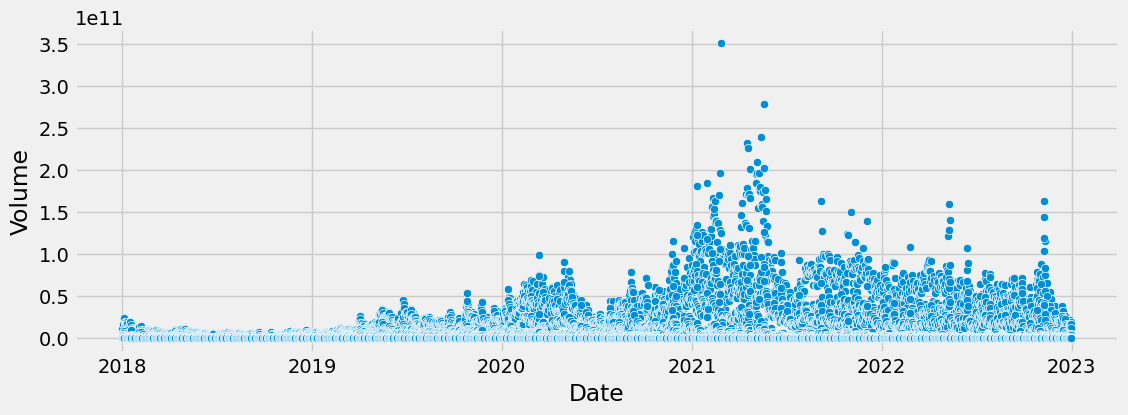

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x='Date', y='Volume')
plt.show()

In [ ]:
df['Type'].unique()

array(['Tether USD', 'Bitcoin USD', 'Ethereum USD', 'TRON USD', 'BNB USD',
       'XRP USD', 'Cardano USD', 'Dogecoin USD', 'Litecoin USD',
       'Polkadot USD', 'EUR/USD', 'GBP/USD'], dtype=object)

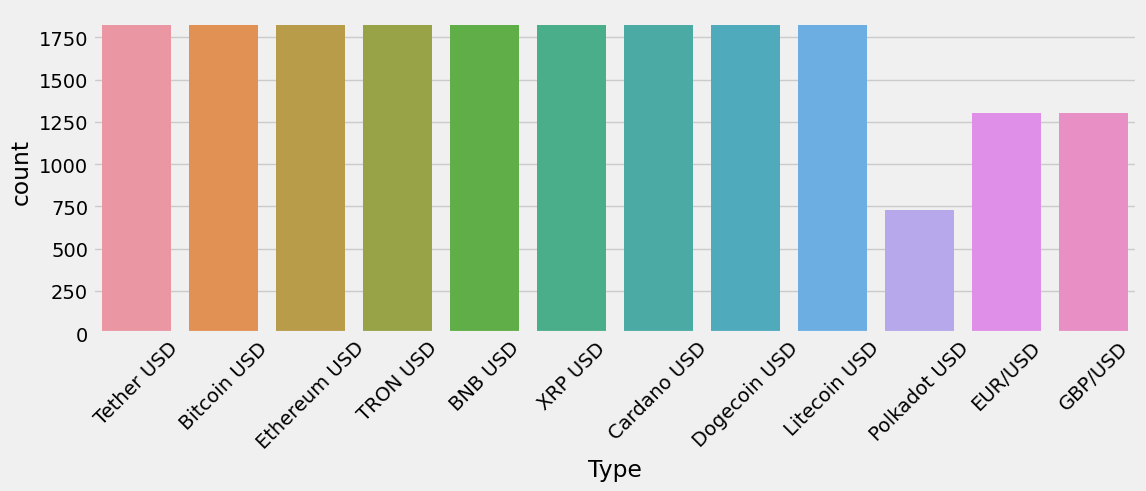

In [ ]:
plt.figure(figsize=(12,4))
types = sns.countplot(data=df, x='Type')
types.set_xticklabels(types.get_xticklabels(), rotation=45);

In [ ]:
select_Tether_usd = df.loc[df['Type']=='Tether USD']
select_Tether_usd.to_csv('tether.csv')

select_Bitcoin_usd = df.loc[df['Type']=='Bitcoin USD']
select_Bitcoin_usd.to_csv('bitcoin.csv')

select_Ethereum_usd = df.loc[df['Type']=='Ethereum USD']
select_Ethereum_usd.to_csv('ethereum.csv')

select_Tron_usd = df.loc[df['Type']=='TRON USD']
select_Tron_usd.to_csv('tron.csv')

select_Bnb_usd = df.loc[df['Type']=='BNB USD']
select_Bnb_usd.to_csv('bnb.csv')

select_Xrp_usd = df.loc[df['Type']=='XRP USD']
select_Xrp_usd.to_csv('xrp.csv')

select_Cardano_usd = df.loc[df['Type']=='Cardano USD']
select_Cardano_usd.to_csv('cardano.csv')

select_Doge_usd = df.loc[df['Type']=='Dogecoin USD']
select_Doge_usd.to_csv('doge.csv')

select_Lite_usd = df.loc[df['Type']=='Litecoin USD']
select_Lite_usd.to_csv('lite.csv')

select_Polkadot_usd = df.loc[df['Type']=='Polkadot USD']
select_Polkadot_usd.to_csv('polkadot.csv')

select_Eur_usd = df.loc[df['Type']=='EUR/USD']
select_Eur_usd.to_csv('eur.csv')

select_Gbp_usd = df.loc[df['Type']=='GBP/USD']
select_Gbp_usd.to_csv('gbp.csv')

In [ ]:
import plotly.express as px
from matplotlib.widgets import RectangleSelector
fig = px.line(select_Tether_usd, x='Date', y='Open', title='Opening Stock Price Tether')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
from matplotlib.widgets import RectangleSelector
fig = px.line(select_Bitcoin_usd, x='Date', y='Open', title='Opening Stock Price Bitcoin')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
from matplotlib.widgets import RectangleSelector
fig = px.line(select_Ethereum_usd, x='Date', y='Open', title='Opening Stock Price Ethereum')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
from matplotlib.widgets import RectangleSelector
fig = px.line(select_Tron_usd, x='Date', y='Open', title='Opening Stock Price Tron')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)

fig.show()

In [ ]:
from matplotlib.widgets import RectangleSelector
fig = px.line(select_Bnb_usd, x='Date', y='Open', title='Opening Stock Price Bnb')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
from matplotlib.widgets import RectangleSelector
fig = px.line(select_Xrp_usd, x='Date', y='Open', title='Opening Stock Price Xrp')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
fig = px.line(select_Cardano_usd, x='Date', y='Open', title='Opening Stock Price of Cardano')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()
fig = px.line(select_Doge_usd, x='Date', y='Open', title='Opening Stock Price Doge')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()
fig = px.line(select_Lite_usd, x='Date', y='Open', title='Opening Stock Price Lite')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()
fig = px.line(select_Polkadot_usd, x='Date', y='Open', title='Opening Stock Price Polkadot')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()
fig = px.line(select_Eur_usd, x='Date', y='Open', title='Opening Stock Price Eur')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()
fig = px.line(select_Gbp_usd, x='Date', y='Open', title='Opening Stock Price Gbp')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
'''select_Tether_usd = df.loc[df['Type']=='Tether USD']
select_Bitcoin_usd = df.loc[df['Type']=='Bitcoin USD']
select_Ethereum_usd = df.loc[df['Type']=='Ethereum USD']
select_Tron_usd = df.loc[df['Type']=='TRON USD']
select_Bnb_usd = df.loc[df['Type']=='BNB USD']
select_Xrp_usd = df.loc[df['Type']=='XRP USD']
select_Cardano_usd = df.loc[df['Type']=='Cardano USD']
select_Doge_usd = df.loc[df['Type']=='Dogecoin USD']
select_Lite_usd = df.loc[df['Type']=='Litecoin USD']
select_Polkadot_usd = df.loc[df['Type']=='Polkadot USD']
select_Eur_usd = df.loc[df['Type']=='EUR/USD']
select_Gbp_usd = df.loc[df['Type']=='GBP/USD']'''

"select_Tether_usd = df.loc[df['Type']=='Tether USD']\nselect_Bitcoin_usd = df.loc[df['Type']=='Bitcoin USD']\nselect_Ethereum_usd = df.loc[df['Type']=='Ethereum USD']\nselect_Tron_usd = df.loc[df['Type']=='TRON USD']\nselect_Bnb_usd = df.loc[df['Type']=='BNB USD']\nselect_Xrp_usd = df.loc[df['Type']=='XRP USD']\nselect_Cardano_usd = df.loc[df['Type']=='Cardano USD']\nselect_Doge_usd = df.loc[df['Type']=='Dogecoin USD']\nselect_Lite_usd = df.loc[df['Type']=='Litecoin USD']\nselect_Polkadot_usd = df.loc[df['Type']=='Polkadot USD']\nselect_Eur_usd = df.loc[df['Type']=='EUR/USD']\nselect_Gbp_usd = df.loc[df['Type']=='GBP/USD']"

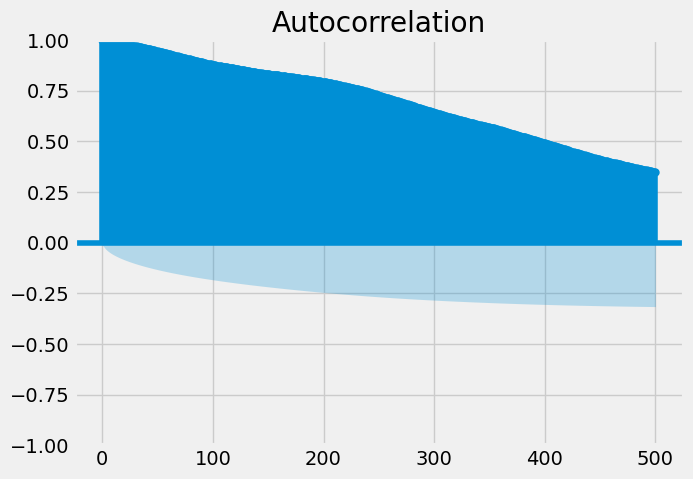

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(df['Open'], lags=500);

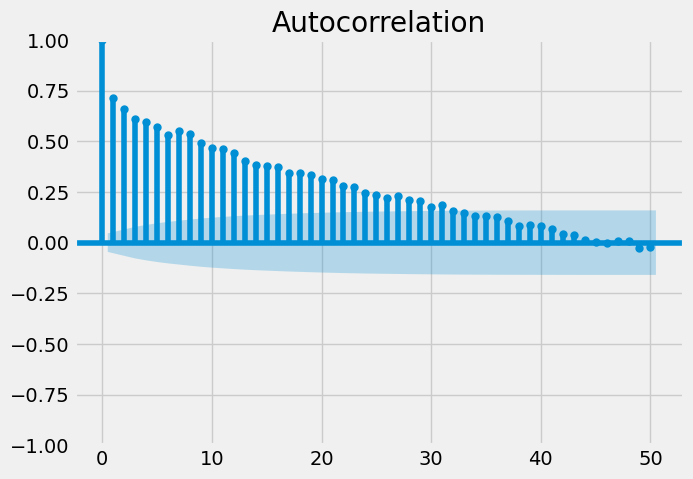

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(select_Tether_usd['Open'], lags=50);

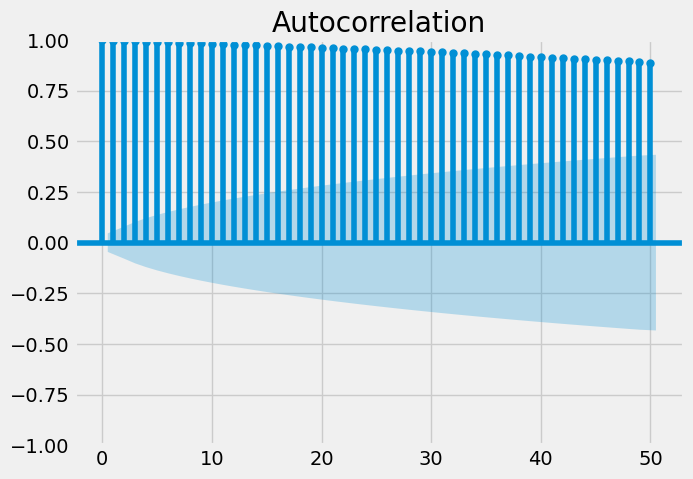

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(select_Bitcoin_usd['Open'], lags=50);

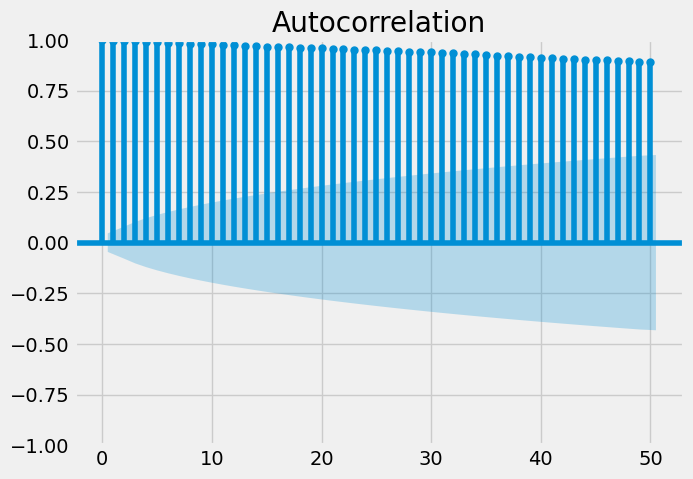

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(select_Ethereum_usd['Open'], lags=50);

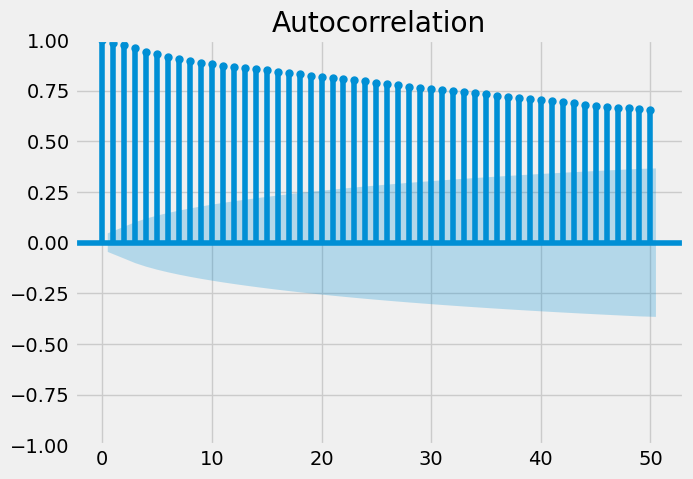

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(select_Tron_usd['Open'], lags=50);

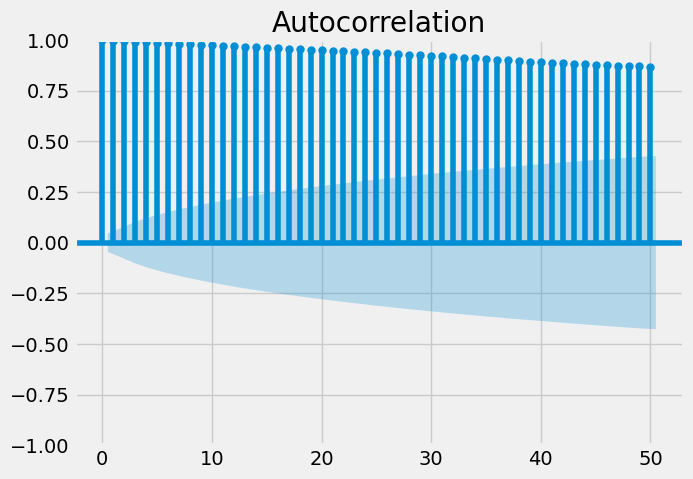

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(select_Bnb_usd['Open'], lags=50);

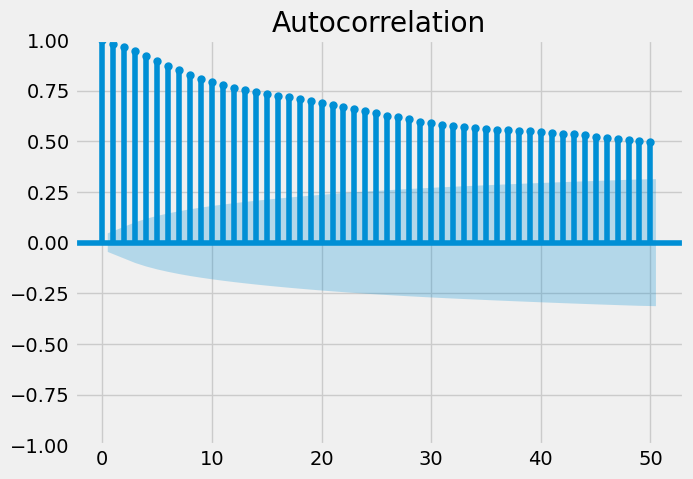

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(select_Xrp_usd['Open'], lags=50);

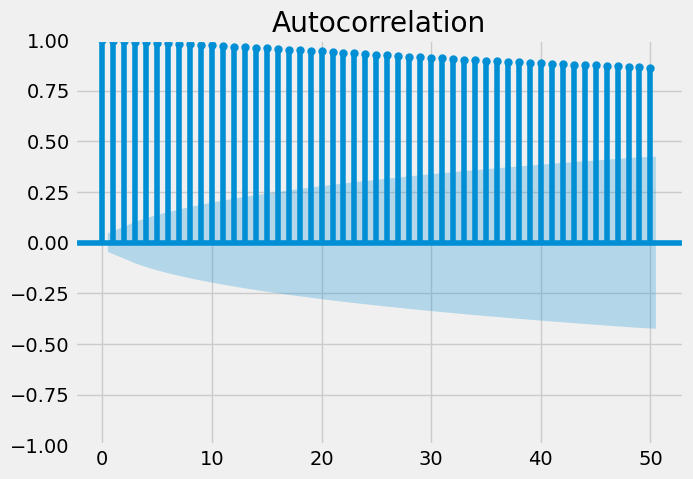

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(select_Cardano_usd['Open'], lags=50);

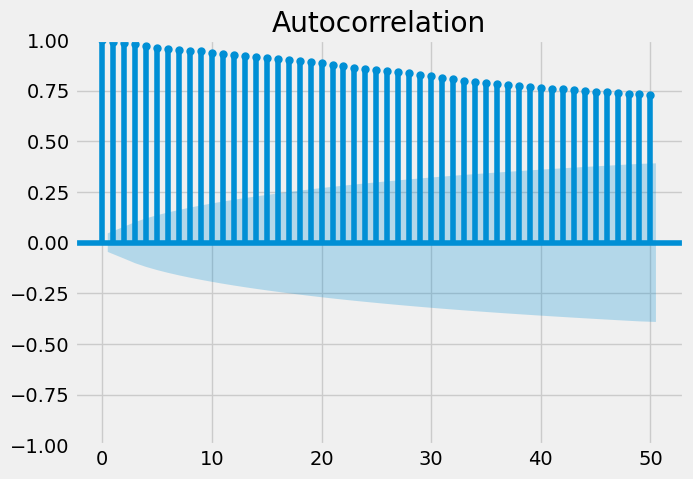

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(select_Doge_usd['Open'], lags=50);

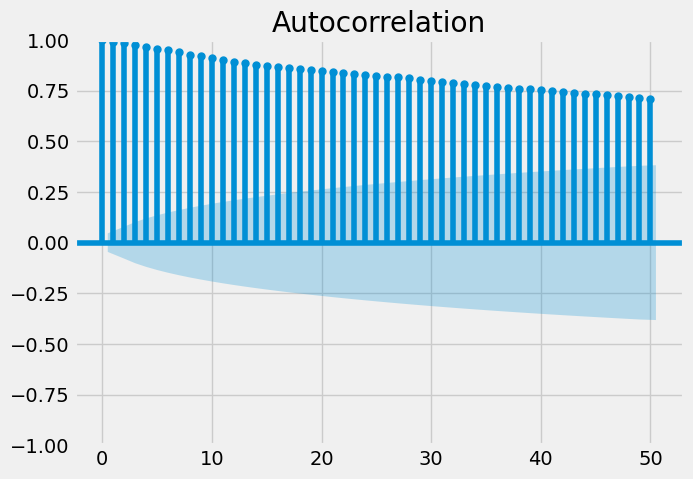

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(select_Lite_usd['Open'], lags=50);

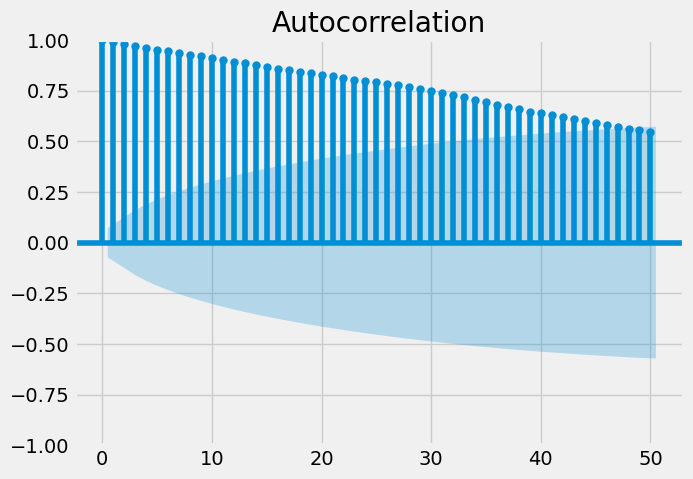

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(select_Polkadot_usd['Open'], lags=50);

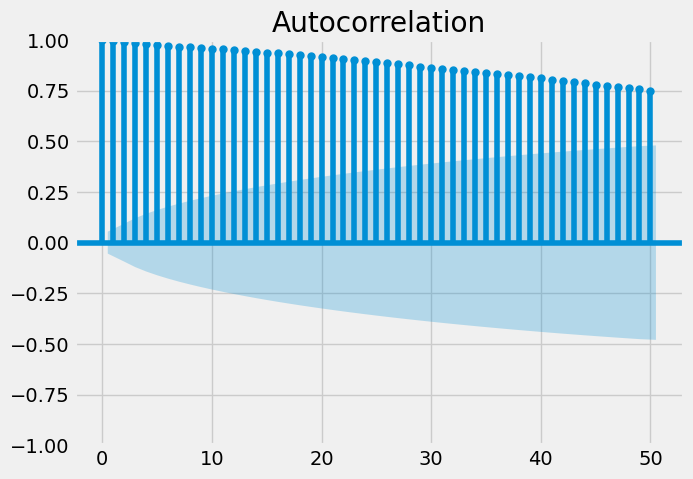

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(select_Eur_usd['Open'], lags=50);

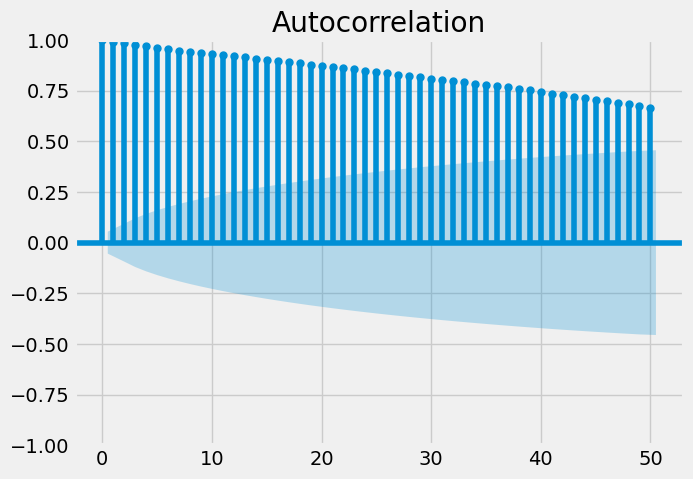

In [ ]:
plt.rc("figure", figsize=(7,5))
sm.graphics.tsa.plot_acf(select_Gbp_usd['Open'], lags=50);

#### Using Built-In FB-Prophet Visualization

#### Evaluating the model

In [ ]:
#from statsmodels.tools.eval_measures import rmse

In [ ]:
#full_predictions = forecast.iloc[-6920:]['yhat']

In [ ]:
#print('Root mean squared error between actual and predicted values: ',rmse(full_predictions,test['y']))
#print('Mean Value of Test Dataset: ', test['y'].mean())

#### UNIVARIATE ANALYSIS OF MULTI FEATURE CRYPTOS

In [ ]:
'''select_Tether_usd = df.loc[df['Type']=='Tether USD']
select_Bitcoin_usd = df.loc[df['Type']=='Bitcoin USD']
select_Ethereum_usd = df.loc[df['Type']=='Ethereum USD']
select_Tron_usd = df.loc[df['Type']=='TRON USD']
select_Bnb_usd = df.loc[df['Type']=='BNB USD']
select_Xrp_usd = df.loc[df['Type']=='XRP USD']
select_Cardano_usd = df.loc[df['Type']=='Cardano USD']
select_Doge_usd = df.loc[df['Type']=='Dogecoin USD']
select_Lite_usd = df.loc[df['Type']=='Litecoin USD']
select_Polkadot_usd = df.loc[df['Type']=='Polkadot USD']
select_Eur_usd = df.loc[df['Type']=='EUR/USD']
select_Gbp_usd = df.loc[df['Type']=='GBP/USD']'''

"select_Tether_usd = df.loc[df['Type']=='Tether USD']\nselect_Bitcoin_usd = df.loc[df['Type']=='Bitcoin USD']\nselect_Ethereum_usd = df.loc[df['Type']=='Ethereum USD']\nselect_Tron_usd = df.loc[df['Type']=='TRON USD']\nselect_Bnb_usd = df.loc[df['Type']=='BNB USD']\nselect_Xrp_usd = df.loc[df['Type']=='XRP USD']\nselect_Cardano_usd = df.loc[df['Type']=='Cardano USD']\nselect_Doge_usd = df.loc[df['Type']=='Dogecoin USD']\nselect_Lite_usd = df.loc[df['Type']=='Litecoin USD']\nselect_Polkadot_usd = df.loc[df['Type']=='Polkadot USD']\nselect_Eur_usd = df.loc[df['Type']=='EUR/USD']\nselect_Gbp_usd = df.loc[df['Type']=='GBP/USD']"

In [ ]:
df_tether = select_Tether_usd[['Date','Open']]

In [ ]:
df_tether.columns = ['ds','y']

In [ ]:
from prophet import Prophet

In [ ]:
model_tether = Prophet()

In [ ]:
model_tether.fit(df_tether)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/0tf05kg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/1m8p2pxf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86353', 'data', 'file=/tmp/tmp4078oezg/0tf05kg3.json', 'init=/tmp/tmp4078oezg/1m8p2pxf.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modelfkv_nf1g/prophet_model-20230417202338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:23:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:23:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_tether.tail()

ds         y
1821 2022-12-27  0.999964
1822 2022-12-28  0.999855
1823 2022-12-29  0.999679
1824 2022-12-30  0.999731
1825 2022-12-31  0.999669

In [ ]:
future_dates_tether = model_tether.make_future_dataframe(periods=60)

In [ ]:
prediction_tether = model_tether.predict(future_dates_tether)

In [ ]:
prediction_tether.tail()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1881 2023-02-25  1.000278    0.995259    1.007105     0.997932     1.002759   
1882 2023-02-26  1.000279    0.995581    1.007609     0.997847     1.002835   
1883 2023-02-27  1.000280    0.995306    1.007324     0.997725     1.002957   
1884 2023-02-28  1.000281    0.995130    1.007474     0.997599     1.003011   
1885 2023-03-01  1.000283    0.995370    1.006945     0.997475     1.003061   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
1881        0.001064              0.001064              0.001064  0.000027   
1882        0.001303              0.001303              0.001303  0.000185   
1883        0.001107              0.001107              0.001107 -0.000068   
1884        0.001023              0.001023              0.001023 -0.000185   
1885        0.001082              0.001082              0.001082 -0.000135   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
1881      0.000027      0.000027  0.001036      0.001036      0.001036   
1882      0.000185      0.000185  0.001118      0.001118      0.001118   
1883     -0.000068     -0.000068  0.001175      0.001175      0.001175   
1884     -0.000185     -0.000185  0.001207      0.001207      0.001207   
1885     -0.000135     -0.000135  0.001217      0.001217      0.001217   

      multiplicative_terms  multiplicative_terms_lower  \
1881                   0.0                         0.0   
1882                   0.0                         0.0   
1883                   0.0                         0.0   
1884                   0.0                         0.0   
1885                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
1881                         0.0  1.001341  
1882                         0.0  1.001582  
1883                         0.0  1.001387  
1884                         0.0  1.001304  
1885                         0.0  1.001364

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model_tether,prediction_tether)

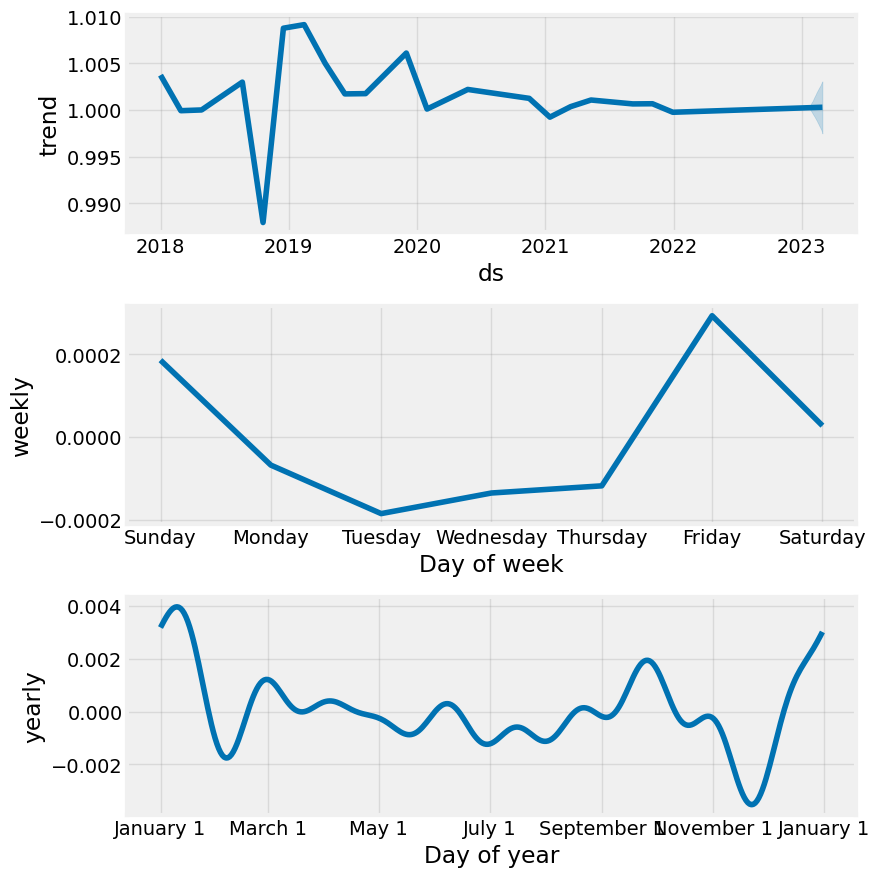

In [ ]:
fig_tether = model_tether.plot_components(prediction_tether)

In [ ]:
from prophet.diagnostics import cross_validation
df_tether_cv = cross_validation(model_tether, horizon='60 days')

INFO:prophet:Making 47 forecasts with cutoffs between 2019-01-21 00:00:00 and 2022-11-01 00:00:00


  0%|          | 0/47 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/eic08x_k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/ip3amf4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11645', 'data', 'file=/tmp/tmp4078oezg/eic08x_k.json', 'init=/tmp/tmp4078oezg/ip3amf4w.json', 'output', 'file=/tmp/tmp4078oezg/prophet_model74361ij2/prophet_model-20230417202342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:23:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:23:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/inrbbujf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/mqn_m8mo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [ ]:
from prophet.diagnostics import performance_metrics
df_tether_performance = performance_metrics(df_tether_cv)

In [ ]:
df_tether_performance

horizon       mse      rmse       mae      mape     mdape     smape  \
0   6 days  0.000021  0.004580  0.002774  0.002774  0.001541  0.002770   
1   7 days  0.000022  0.004637  0.002873  0.002874  0.001724  0.002869   
2   8 days  0.000022  0.004687  0.003045  0.003044  0.001840  0.003039   
3   9 days  0.000020  0.004501  0.003023  0.003019  0.001894  0.003017   
4  10 days  0.000023  0.004787  0.003274  0.003270  0.001986  0.003267   
5  11 days  0.000024  0.004932  0.003410  0.003405  0.002242  0.003403   
6  12 days  0.000025  0.005007  0.003508  0.003503  0.002347  0.003501   
7  13 days  0.000026  0.005145  0.003628  0.003623  0.002471  0.003620   
8  14 days  0.000028  0.005250  0.003747  0.003740  0.002757  0.003739   
9  15 days  0.000030  0.005480  0.003954  0.003946  0.002970  0.003945   
10 16 days  0.000033  0.005724  0.004108  0.004100  0.002999  0.004100   
11 17 days  0.000037  0.006115  0.004375  0.004366  0.003053  0.004366   
12 18 days  0.000039  0.006276  0.004465  0.004456  0.003127  0.004456   
13 19 days  0.000043  0.006534  0.004648  0.004638  0.003172  0.004639   
14 20 days  0.000045  0.006717  0.004741  0.004730  0.003158  0.004733   
15 21 days  0.000047  0.006885  0.004810  0.004799  0.003136  0.004802   
16 22 days  0.000051  0.007123  0.004991  0.004978  0.003159  0.004982   
17 23 days  0.000051  0.007138  0.004937  0.004925  0.003082  0.004929   
18 24 days  0.000055  0.007435  0.005105  0.005092  0.003082  0.005096   
19 25 days  0.000057  0.007544  0.005128  0.005116  0.003082  0.005119   
20 26 days  0.000060  0.007719  0.005207  0.005195  0.003032  0.005198   
21 27 days  0.000066  0.008141  0.005408  0.005392  0.003030  0.005396   
22 28 days  0.000069  0.008322  0.005357  0.005340  0.002966  0.005344   
23 29 days  0.000072  0.008498  0.005425  0.005407  0.002919  0.005411   
24 30 days  0.000074  0.008606  0.005425  0.005408  0.002762  0.005411   
25 31 days  0.000079  0.008883  0.005496  0.005479  0.002731  0.005480   
26 32 days  0.000085  0.009192  0.005547  0.005533  0.002663  0.005531   
27 33 days  0.000085  0.009217  0.005449  0.005442  0.002569  0.005437   
28 34 days  0.000084  0.009172  0.005381  0.005375  0.002526  0.005368   
29 35 days  0.000087  0.009350  0.005424  0.005419  0.002250  0.005410   
30 36 days  0.000091  0.009549  0.005477  0.005473  0.002331  0.005462   
31 37 days  0.000090  0.009499  0.005439  0.005435  0.002265  0.005424   
32 38 days  0.000088  0.009382  0.005414  0.005408  0.002452  0.005397   
33 39 days  0.000087  0.009302  0.005441  0.005432  0.002707  0.005422   
34 40 days  0.000088  0.009405  0.005534  0.005525  0.002753  0.005513   
35 41 days  0.000088  0.009380  0.005522  0.005513  0.002765  0.005501   
36 42 days  0.000087  0.009329  0.005514  0.005504  0.002765  0.005492   
37 43 days  0.000090  0.009478  0.005629  0.005619  0.002948  0.005605   
38 44 days  0.000092  0.009576  0.005695  0.005685  0.002809  0.005670   
39 45 days  0.000098  0.009904  0.005817  0.005805  0.002809  0.005791   
40 46 days  0.000104  0.010202  0.005982  0.005971  0.003086  0.005955   
41 47 days  0.000109  0.010444  0.006146  0.006135  0.003256  0.006118   
42 48 days  0.000114  0.010660  0.006289  0.006278  0.003261  0.006260   
43 49 days  0.000117  0.010815  0.006425  0.006412  0.003261  0.006395   
44 50 days  0.000122  0.011038  0.006570  0.006556  0.003322  0.006539   
45 51 days  0.000123  0.011091  0.006670  0.006655  0.003261  0.006638   
46 52 days  0.000128  0.011299  0.006797  0.006782  0.003231  0.006765   
47 53 days  0.000134  0.011591  0.006955  0.006938  0.003219  0.006922   
48 54 days  0.000139  0.011797  0.007084  0.007066  0.003219  0.007049   
49 55 days  0.000144  0.011985  0.007124  0.007108  0.003231  0.007089   
50 56 days  0.000151  0.012283  0.007267  0.007252  0.003219  0.007232   
51 57 days  0.000174  0.013191  0.007557  0.007534  0.003149  0.007518   
52 58 days  0.000178  0.013328  0.007648  0.007622  0.003231  0.007608   
53 59 d

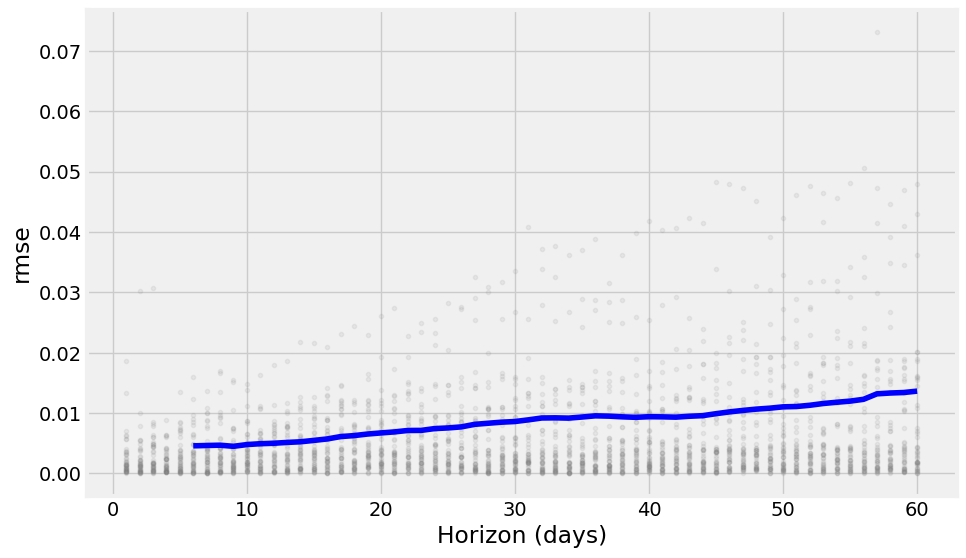

In [ ]:
from prophet import plot
fig2_tether = plot.plot_cross_validation_metric(df_tether_cv, metric = 'rmse')

In [ ]:
df_bitcoin = select_Bitcoin_usd[['Date','Open']]
df_bitcoin.columns = ['ds','y']
model_bitcoin = Prophet()
model_bitcoin.fit(df_bitcoin)
future_dates_bitcoin = model_bitcoin.make_future_dataframe(periods=60)
prediction_bitcoin = model_bitcoin.predict(future_dates_bitcoin)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/x1lgitgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/ezysy0hg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5946', 'data', 'file=/tmp/tmp4078oezg/x1lgitgo.json', 'init=/tmp/tmp4078oezg/ezysy0hg.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modelfhfmn023/prophet_model-20230417202428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:24:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:24:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model_bitcoin,prediction_bitcoin)

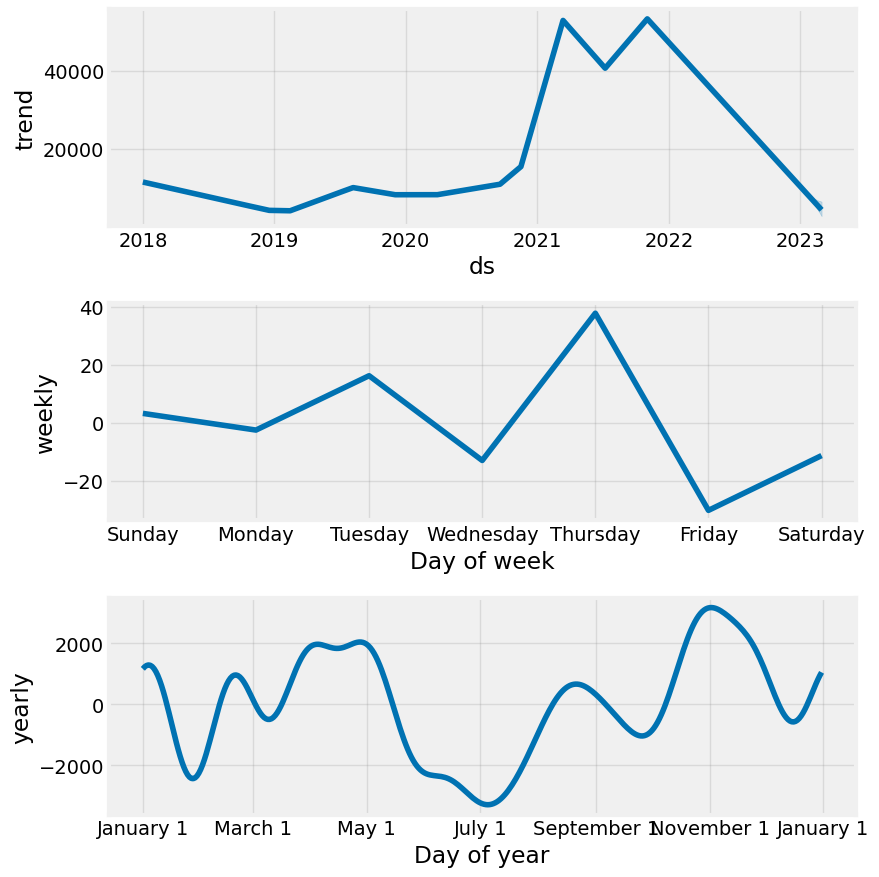

In [ ]:
fig_bitcoin = model_bitcoin.plot_components(prediction_bitcoin)


In [ ]:
df_bitcoin_cv = cross_validation(model_bitcoin, horizon='60 days')

INFO:prophet:Making 47 forecasts with cutoffs between 2019-01-21 00:00:00 and 2022-11-01 00:00:00


  0%|          | 0/47 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/aajwn25z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/fy9hh1n_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96007', 'data', 'file=/tmp/tmp4078oezg/aajwn25z.json', 'init=/tmp/tmp4078oezg/fy9hh1n_.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modelm141_pxq/prophet_model-20230417202430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:24:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:24:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/xkifp4_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/6uj3v8o3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [ ]:
df_bitcoin_performance = performance_metrics(df_bitcoin_cv)
df_bitcoin_performance

horizon           mse          rmse          mae      mape     mdape  \
0   6 days  4.027327e+07   6346.122579  4342.328610  0.196321  0.164825   
1   7 days  4.343259e+07   6590.340347  4546.526529  0.208185  0.176235   
2   8 days  4.743903e+07   6887.599791  4758.022232  0.218982  0.181416   
3   9 days  5.129018e+07   7161.716458  4946.916955  0.228773  0.185035   
4  10 days  5.639510e+07   7509.667402  5156.519976  0.240775  0.190609   
5  11 days  6.091964e+07   7805.103382  5333.277534  0.251017  0.193537   
6  12 days  6.634274e+07   8145.104993  5511.758681  0.260865  0.199450   
7  13 days  7.219774e+07   8496.925564  5658.279206  0.268545  0.201195   
8  14 days  7.802184e+07   8832.997067  5829.879685  0.278017  0.203848   
9  15 days  8.107606e+07   9004.224391  5923.690250  0.284682  0.203848   
10 16 days  8.207612e+07   9059.586937  5939.342658  0.287101  0.203848   
11 17 days  8.400869e+07   9165.625256  5966.543348  0.289946  0.201335   
12 18 days  8.489690e+07   9213.951410  5986.651027  0.291689  0.204509   
13 19 days  8.479308e+07   9208.315963  6004.815160  0.292400  0.202919   
14 20 days  8.403618e+07   9167.125072  5984.941614  0.290921  0.204458   
15 21 days  8.355790e+07   9141.001140  5944.729466  0.289367  0.205765   
16 22 days  8.344817e+07   9134.996786  5931.780992  0.288249  0.205449   
17 23 days  8.439931e+07   9186.909619  5986.641174  0.287851  0.209960   
18 24 days  8.518209e+07   9229.414427  6038.083392  0.287245  0.212360   
19 25 days  8.512589e+07   9226.369227  6030.779823  0.284628  0.213050   
20 26 days  8.508339e+07   9224.065856  6036.141258  0.283999  0.213138   
21 27 days  8.761394e+07   9360.231951  6128.460451  0.288670  0.218971   
22 28 days  9.048024e+07   9512.110342  6236.939210  0.293709  0.227153   
23 29 days  9.326628e+07   9657.446687  6320.344780  0.298416  0.233329   
24 30 days  9.716713e+07   9857.338749  6447.715622  0.303510  0.236326   
25 31 days  1.006224e+08  10031.071807  6604.071111  0.309976  0.239610   
26 32 days  1.035715e+08  10177.008734  6747.825801  0.314930  0.244526   
27 33 days  1.070084e+08  10344.486840  6910.863511  0.317172  0.257915   
28 34 days  1.108772e+08  10529.825745  7091.462798  0.319528  0.267337   
29 35 days  1.130054e+08  10630.398690  7239.825473  0.321130  0.274757   
30 36 days  1.143260e+08  10692.334829  7354.013859  0.323479  0.277368   
31 37 days  1.177810e+08  10852.697276  7518.750128  0.328987  0.283714   
32 38 days  1.226633e+08  11075.348343  7682.812402  0.333468  0.284990   
33 39 days  1.272238e+08  11279.354685  7838.115875  0.337772  0.283714   
34 40 days  1.331777e+08  11540.264527  8003.630356  0.344687  0.283714   
35 41 days  1.388564e+08  11783.736442  8138.775542  0.350746  0.279030   
36 42 days  1.449258e+08  12038.513546  8268.783039  0.355659  0.270738   
37 43 days  1.515384e+08  12310.093317  8382.383240  0.359042  0.253628   
38 44 days  1.578044e+08  12562.020414  8528.859117  0.364906  0.249381   
39 45 days  1.603544e+08  12663.113419  8585.648281  0.367980  0.247683   
40 46 days  1.604518e+08  12666.958604  8581.875906  0.367410  0.243982   
41 47 days  1.621258e+08  12732.864922  8609.997209  0.368639  0.246762   
42 48 days  1.630721e+08  12769.968836  8634.042887  0.369721  0.246762   
43 49 days  1.628560e+08  12761.503698  8668.283968  0.371413  0.250154   
44 50 days  1.624118e+08  12744.088829  8682.183164  0.372249  0.254435   
45 51 days  1.631322e+08  12772.322832  8696.222655  0.374486  0.254435   
46 52 days  1.637471e+08  12796.372395  8729.511692  0.377758  0.254435   
47 53 days  1.655796e+08  12867.775390  8824.881375  0.381974  0.268758   
48 54 days  1.676016e+08  12946.102179  8913.184676  0.386047  0.279256   
49 55 days  1.683718e+08  12975.815734  8934.626003  0.387118  0.288390   
50 56 days  1.693148e+08  13012.103733  8960.092791  0.389624  0.293010   
51 57 days  1.728471e+08  13147.133424  9047.770164  0.394296  0.297435   
52 58 days  1.771955e+08  13

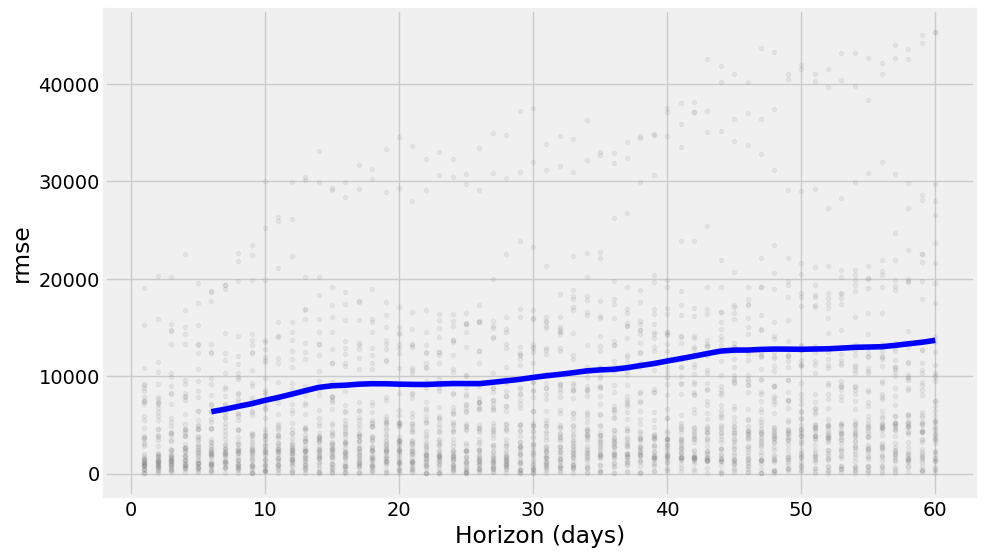

In [ ]:
fig2_bitcoin = plot.plot_cross_validation_metric(df_bitcoin_cv, metric = 'rmse')

In [ ]:
df_ethereum = select_Ethereum_usd[['Date','Open']]
df_ethereum.columns = ['ds','y']
model_ethereum = Prophet()
model_ethereum.fit(df_ethereum)
future_dates_ethereum = model_ethereum.make_future_dataframe(periods=60)
prediction_ethereum = model_ethereum.predict(future_dates_ethereum)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/p0146u9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/94hmfpcn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32797', 'data', 'file=/tmp/tmp4078oezg/p0146u9q.json', 'init=/tmp/tmp4078oezg/94hmfpcn.json', 'output', 'file=/tmp/tmp4078oezg/prophet_model5gdxr0oq/prophet_model-20230417202456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:24:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:24:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model_ethereum,prediction_ethereum)


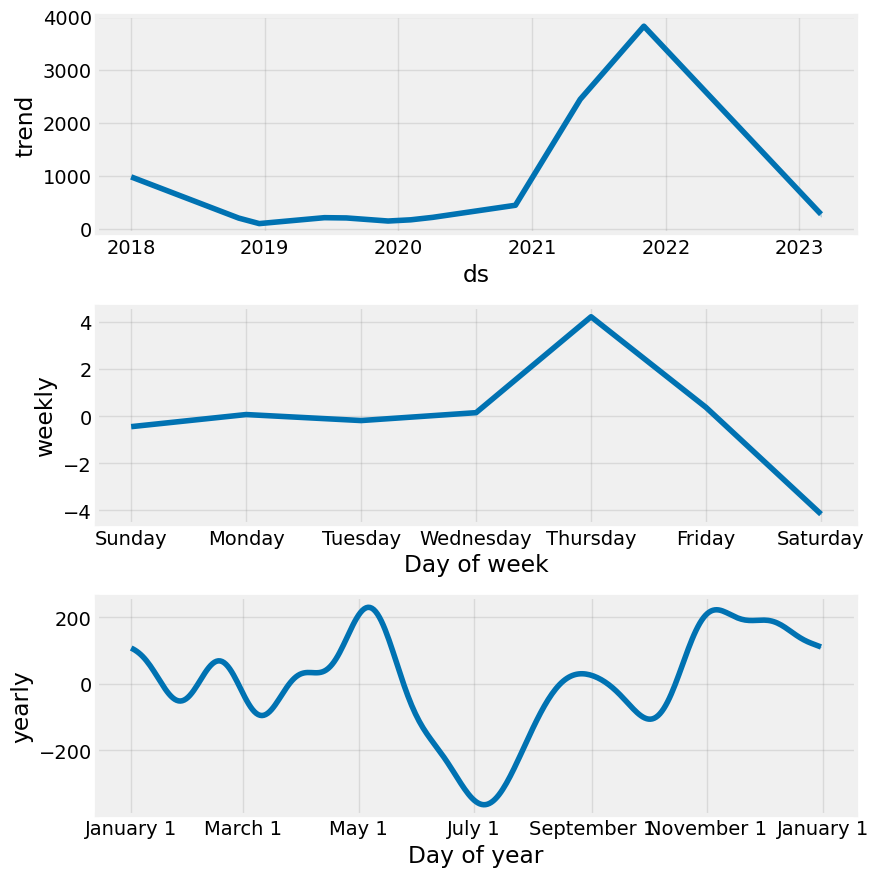

In [ ]:
fig_ethereum = model_ethereum.plot_components(prediction_ethereum)

In [ ]:
df_ethereum_cv = cross_validation(model_ethereum, horizon='60 days')

INFO:prophet:Making 47 forecasts with cutoffs between 2019-01-21 00:00:00 and 2022-11-01 00:00:00


  0%|          | 0/47 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/i3j25786.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/z55wb__w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85842', 'data', 'file=/tmp/tmp4078oezg/i3j25786.json', 'init=/tmp/tmp4078oezg/z55wb__w.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modelxc8lvcbl/prophet_model-20230417202458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:24:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:24:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/hy8e0554.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/y61v6u0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [ ]:
df_ethereum_performance = performance_metrics(df_ethereum_cv)
df_ethereum_performance

horizon            mse        rmse         mae      mape     mdape  \
0   6 days  217702.468310  466.585971  298.920617  0.266318  0.203754   
1   7 days  233237.939756  482.947140  309.333549  0.277301  0.207672   
2   8 days  248431.051107  498.428582  320.083451  0.292224  0.212971   
3   9 days  264521.586644  514.316621  330.195827  0.308586  0.215321   
4  10 days  282647.384294  531.645920  341.529965  0.326523  0.225558   
5  11 days  291262.361847  539.687282  347.023250  0.341983  0.230382   
6  12 days  300845.357477  548.493717  351.806662  0.355005  0.234247   
7  13 days  310077.506318  556.846035  355.556723  0.365400  0.238265   
8  14 days  321039.062745  566.603091  359.640546  0.374813  0.238919   
9  15 days  328571.238262  573.211338  360.854506  0.382519  0.238696   
10 16 days  331041.345174  575.361925  359.327415  0.386555  0.232404   
11 17 days  346212.412532  588.398175  362.339876  0.393314  0.232235   
12 18 days  365223.604497  604.337327  368.456269  0.402326  0.229701   
13 19 days  379166.797500  615.765213  374.728837  0.411564  0.233201   
14 20 days  387773.113673  622.714311  377.895433  0.417251  0.233201   
15 21 days  393700.013527  627.455188  380.438354  0.420821  0.234082   
16 22 days  402475.334252  634.409437  385.611267  0.427383  0.238294   
17 23 days  407179.721287  638.106356  392.843728  0.432679  0.247742   
18 24 days  411300.299558  641.326983  400.039232  0.435544  0.248060   
19 25 days  413460.931244  643.009278  404.988402  0.434706  0.248060   
20 26 days  415748.623142  644.785719  411.206236  0.435275  0.248060   
21 27 days  424501.254387  651.537608  421.144130  0.438616  0.254114   
22 28 days  430061.959022  655.791094  427.792970  0.439917  0.267877   
23 29 days  439622.848759  663.040609  434.344239  0.440340  0.274872   
24 30 days  448337.478849  669.580077  438.700557  0.441455  0.274872   
25 31 days  457116.697279  676.104058  444.184809  0.445815  0.280967   
26 32 days  470806.139821  686.153146  449.836194  0.449632  0.290206   
27 33 days  480999.812441  693.541500  454.968550  0.452055  0.292921   
28 34 days  493124.721059  702.228397  460.793511  0.454823  0.303167   
29 35 days  504442.587931  710.241218  466.868197  0.461182  0.316462   
30 36 days  509825.246831  714.020481  470.923697  0.467765  0.324897   
31 37 days  524277.005882  724.069752  476.863898  0.476223  0.332845   
32 38 days  537128.372660  732.890423  482.605058  0.486745  0.340703   
33 39 days  553956.058201  744.282244  488.283071  0.498665  0.341482   
34 40 days  571668.559156  756.087666  493.499476  0.511931  0.355867   
35 41 days  576856.198764  759.510499  493.977791  0.520831  0.361236   
36 42 days  582450.271777  763.184297  492.445342  0.527146  0.361236   
37 43 days  584986.135246  764.843863  490.190060  0.532000  0.363156   
38 44 days  590047.028030  768.145187  489.308838  0.537659  0.372651   
39 45 days  591494.955885  769.087093  487.314561  0.541740  0.372651   
40 46 days  590497.274794  768.438205  485.308709  0.542240  0.372095   
41 47 days  606475.174544  778.765160  489.984399  0.547665  0.382475   
42 48 days  629196.276929  793.218934  498.902629  0.554991  0.395941   
43 49 days  647287.526052  804.541811  507.262374  0.562594  0.396143   
44 50 days  660173.788827  812.510793  512.867841  0.567453  0.392977   
45 51 days  668488.686599  817.611574  515.978428  0.570053  0.403508   
46 52 days  680504.696615  824.927086  523.552736  0.576448  0.408451   
47 53 days  685483.815836  827.939500  528.641093  0.579033  0.410544   
48 54 days  691316.387854  831.454381  536.020024  0.582002  0.413700   
49 55 days  694195.553213  833.183985  543.460947  0.582204  0.417297   
50 56 days  697955.631213  835.437389  551.687063  0.582535  0.422476   
51 57 days  707965.852436  841.407067  563.518435  0.584888  0.426084   
52 58 days  714319.615999  845.174311  571.367281  0.587126  0.434435   
53 59 days  726039.576785  852.079560  578.678553  0.588649  

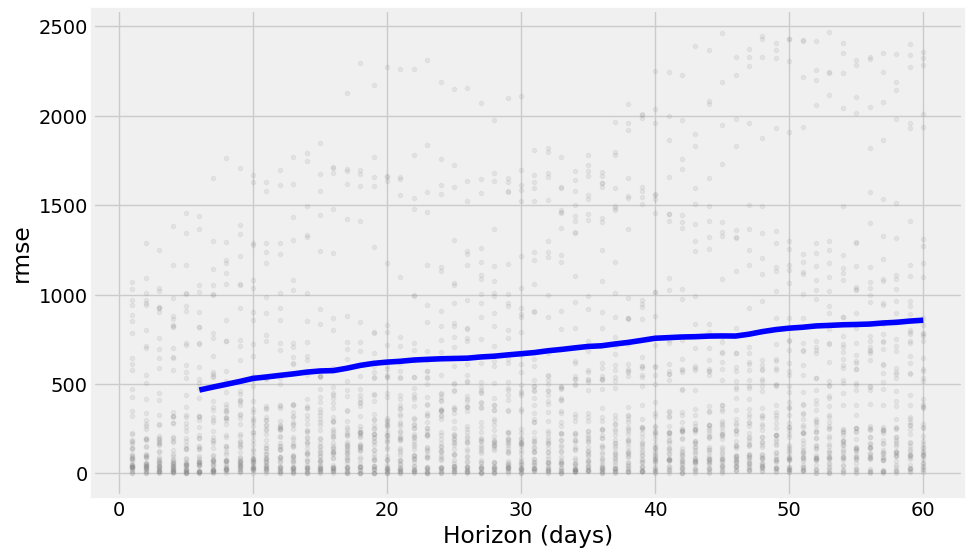

In [ ]:
fig2_ethereum = plot.plot_cross_validation_metric(df_ethereum_cv, metric = 'rmse')

In [ ]:
df_tron = select_Tron_usd[['Date','Open']]
df_tron.columns = ['ds','y']
model_tron = Prophet()
model_tron.fit(df_tron)
future_dates_tron = model_tron.make_future_dataframe(periods=60)
prediction_tron = model_tron.predict(future_dates_tron)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/j48rj9fc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/6lh45bag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24883', 'data', 'file=/tmp/tmp4078oezg/j48rj9fc.json', 'init=/tmp/tmp4078oezg/6lh45bag.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modellph883pq/prophet_model-20230417202521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:25:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:25:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model_tron,prediction_tron)

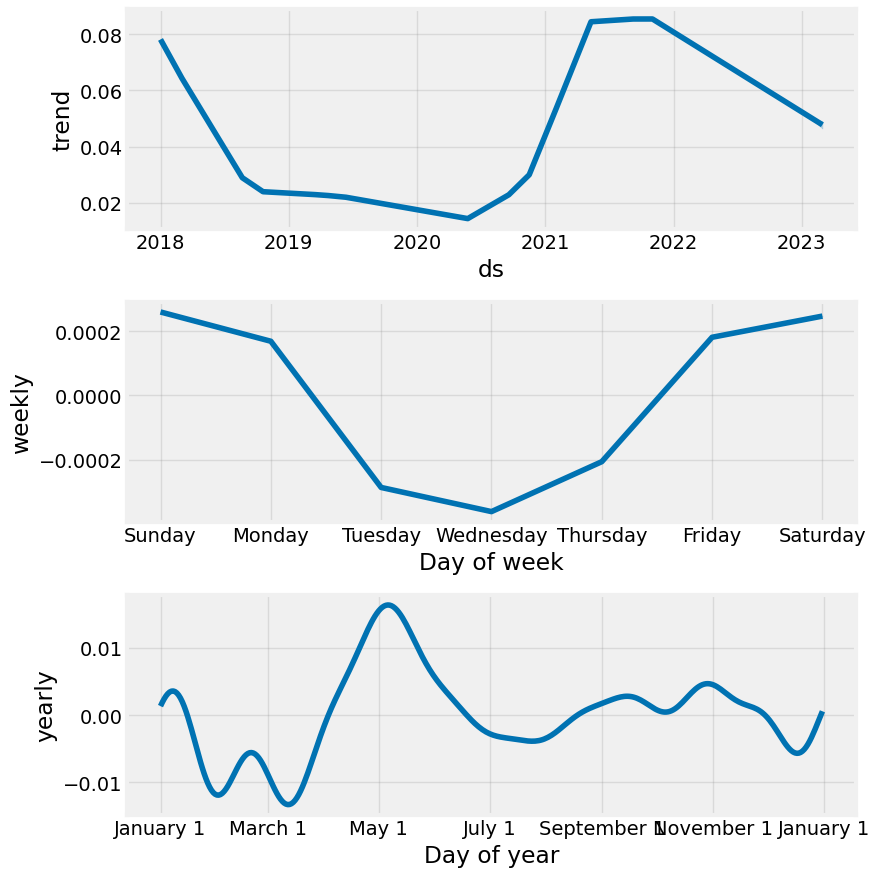

In [ ]:
fig_tron = model_tron.plot_components(prediction_tron)


In [ ]:
df_tron_cv = cross_validation(model_tron, horizon='60 days')

INFO:prophet:Making 47 forecasts with cutoffs between 2019-01-21 00:00:00 and 2022-11-01 00:00:00


  0%|          | 0/47 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/hs4z4zh_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/sdi2i7h0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29421', 'data', 'file=/tmp/tmp4078oezg/hs4z4zh_.json', 'init=/tmp/tmp4078oezg/sdi2i7h0.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modelbc32r3fu/prophet_model-20230417202524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:25:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:25:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/zgj8cysk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/dp3yl1rn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

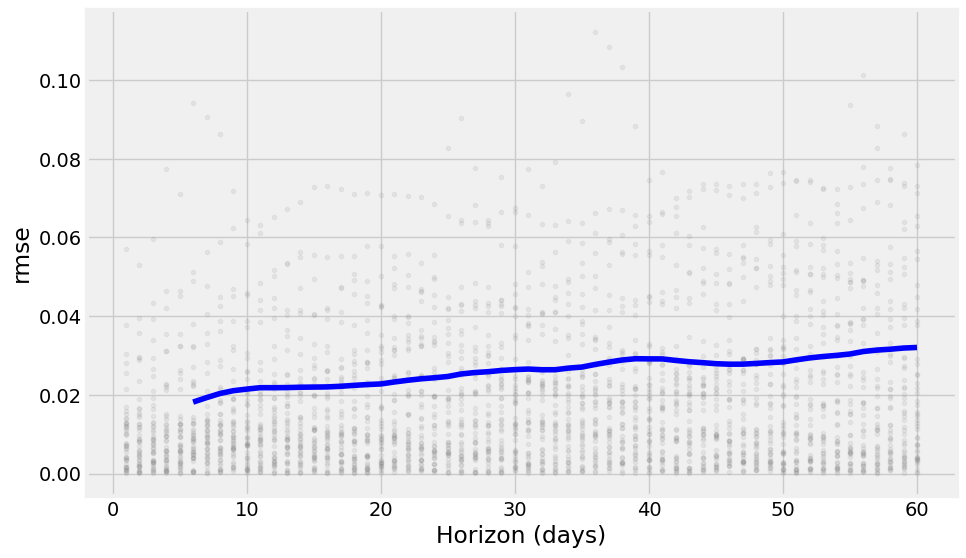

In [ ]:
fig2_tron = plot.plot_cross_validation_metric(df_tron_cv, metric = 'rmse')

In [ ]:
df_bnb = select_Bnb_usd[['Date','Open']]
df_bnb.columns = ['ds','y']
model_bnb = Prophet()
model_bnb.fit(df_bnb)
future_dates_bnb = model_bnb.make_future_dataframe(periods=60)
prediction_bnb = model_bnb.predict(future_dates_bnb)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/zjskj84z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/uu4kcipc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87039', 'data', 'file=/tmp/tmp4078oezg/zjskj84z.json', 'init=/tmp/tmp4078oezg/uu4kcipc.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modelftgl7zri/prophet_model-20230417202547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:25:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:25:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model_bnb,prediction_bnb)

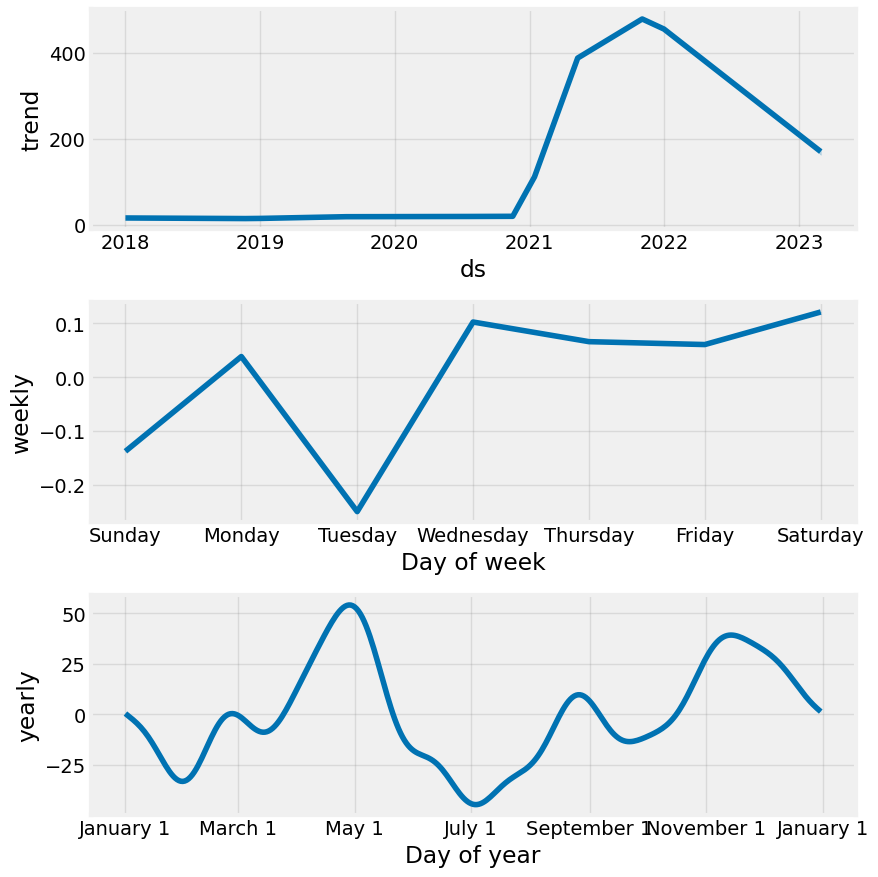

In [ ]:
fig_bnb = model_bnb.plot_components(prediction_bnb)

In [ ]:
df_bnb_cv = cross_validation(model_bnb, horizon='60 days')


INFO:prophet:Making 47 forecasts with cutoffs between 2019-01-21 00:00:00 and 2022-11-01 00:00:00


  0%|          | 0/47 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/t7qwiyqd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/k7tmwxr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57426', 'data', 'file=/tmp/tmp4078oezg/t7qwiyqd.json', 'init=/tmp/tmp4078oezg/k7tmwxr2.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modeljt0oq3b9/prophet_model-20230417202550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:25:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:25:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/hf5emyi8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/ocniuxjl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

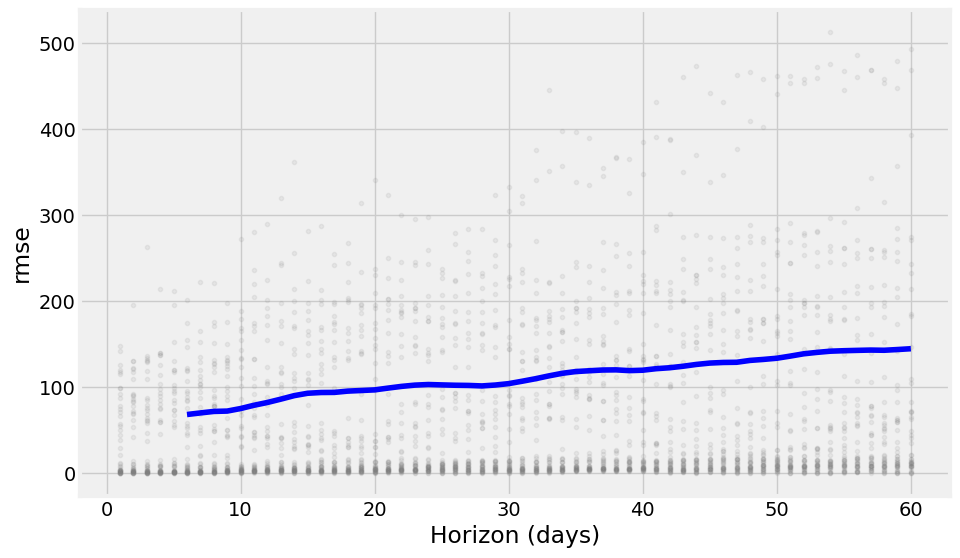

In [ ]:
fig2_bnb = plot.plot_cross_validation_metric(df_bnb_cv, metric = 'rmse')

In [ ]:
df_xrp = select_Xrp_usd[['Date','Open']]
df_xrp.columns = ['ds','y']
model_xrp = Prophet()
model_xrp.fit(df_xrp)
future_dates_xrp = model_xrp.make_future_dataframe(periods=60)
prediction_xrp = model_xrp.predict(future_dates_xrp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/zkt6karu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/e9m10r9w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83955', 'data', 'file=/tmp/tmp4078oezg/zkt6karu.json', 'init=/tmp/tmp4078oezg/e9m10r9w.json', 'output', 'file=/tmp/tmp4078oezg/prophet_model70sqs738/prophet_model-20230417202612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:26:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:26:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model_xrp,prediction_xrp)

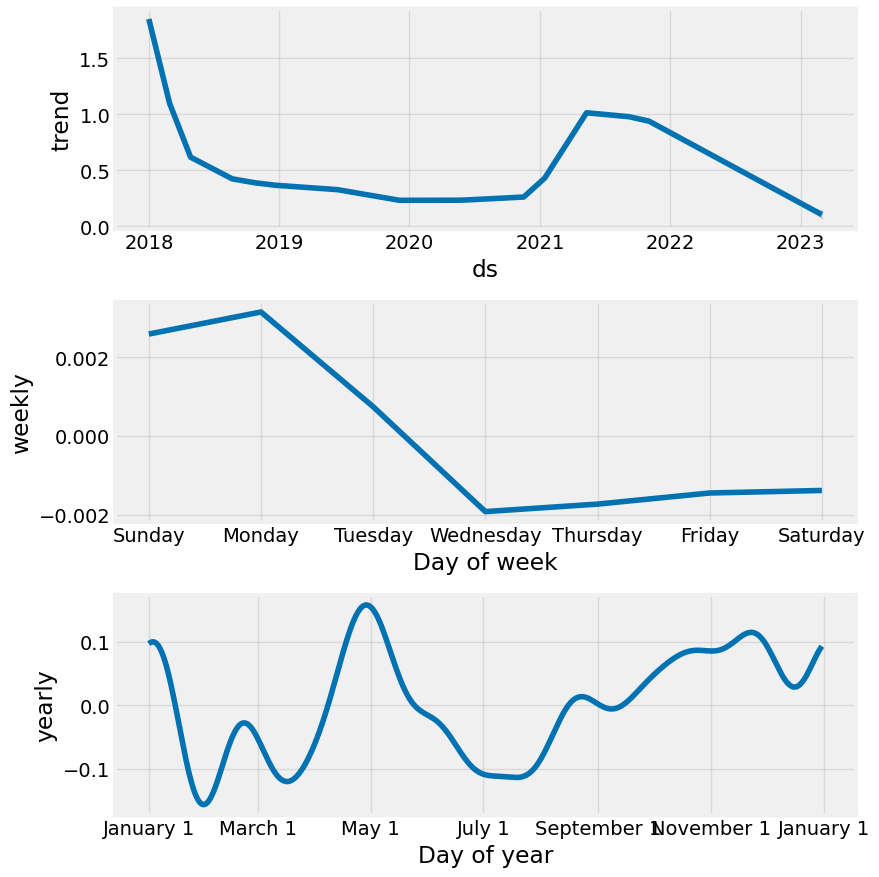

In [ ]:
fig_xrp = model_xrp.plot_components(prediction_xrp)

In [ ]:
df_xrp_cv = cross_validation(model_xrp, horizon='60 days')

INFO:prophet:Making 47 forecasts with cutoffs between 2019-01-21 00:00:00 and 2022-11-01 00:00:00


  0%|          | 0/47 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/sniapfbm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/oiv49btm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95110', 'data', 'file=/tmp/tmp4078oezg/sniapfbm.json', 'init=/tmp/tmp4078oezg/oiv49btm.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modelwaxh00ma/prophet_model-20230417202614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:26:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:26:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/5j7hma3k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/8b_co90t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

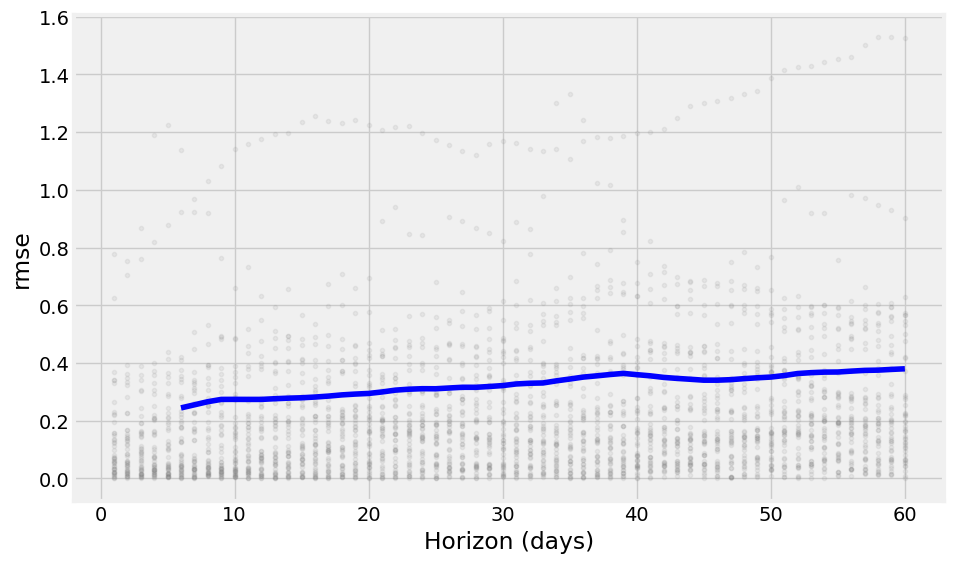

In [ ]:
fig2_xrp = plot.plot_cross_validation_metric(df_xrp_cv, metric = 'rmse')


In [ ]:
df_card = select_Cardano_usd[['Date','Open']]
df_card.columns = ['ds','y']
model_card = Prophet()
model_card.fit(df_card)
future_dates_card = model_card.make_future_dataframe(periods=60)
prediction_card = model_card.predict(future_dates_card)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/i8h7jkqr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/w6tj1f5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14043', 'data', 'file=/tmp/tmp4078oezg/i8h7jkqr.json', 'init=/tmp/tmp4078oezg/w6tj1f5j.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modell6lz03_9/prophet_model-20230417202651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:26:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:26:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model_card,prediction_card)

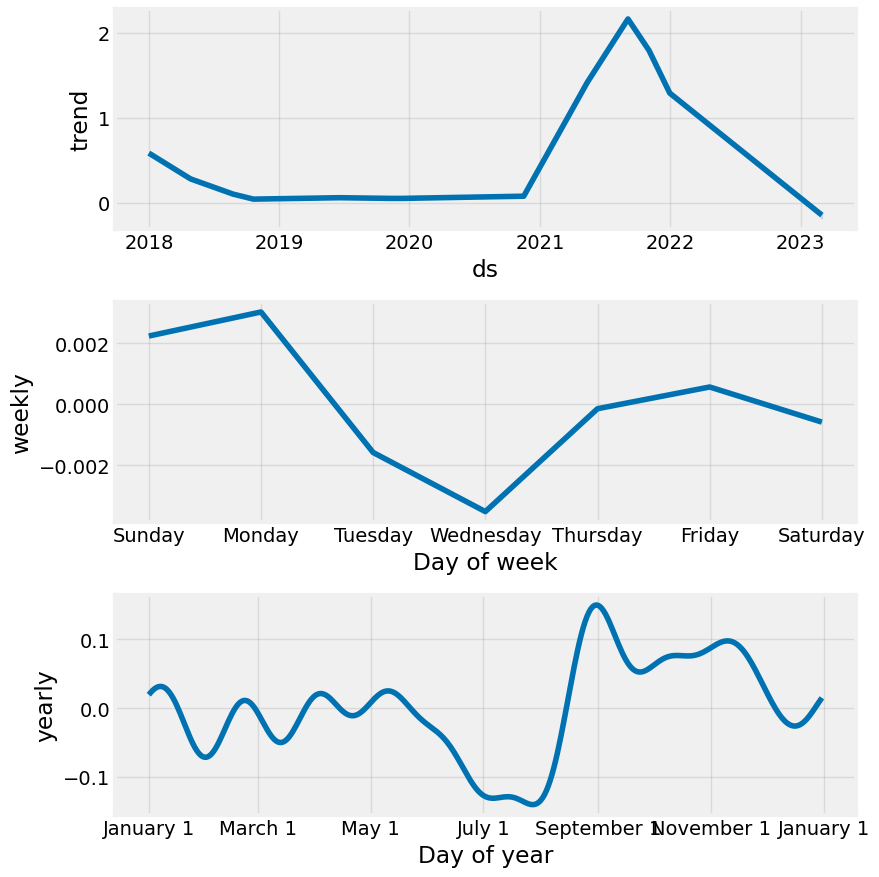

In [ ]:
fig_card = model_card.plot_components(prediction_card)

In [ ]:
df_card_cv = cross_validation(model_card, horizon='60 days')

INFO:prophet:Making 47 forecasts with cutoffs between 2019-01-21 00:00:00 and 2022-11-01 00:00:00


  0%|          | 0/47 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/z81zodzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/o1vuy6hn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36951', 'data', 'file=/tmp/tmp4078oezg/z81zodzx.json', 'init=/tmp/tmp4078oezg/o1vuy6hn.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modelh_1wz93d/prophet_model-20230417202654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:26:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:26:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/cz2fxvkv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/8o2v0cvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

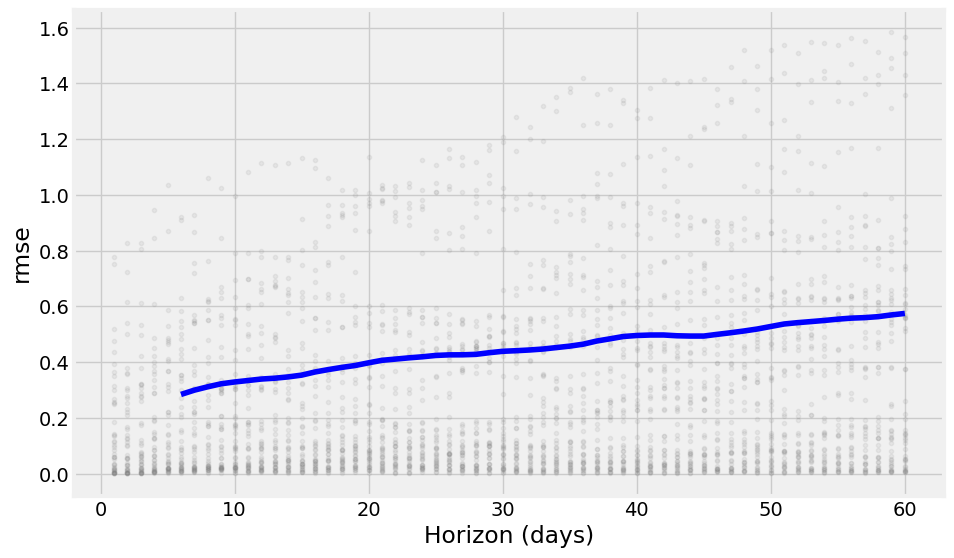

In [ ]:
fig2_card = plot.plot_cross_validation_metric(df_card_cv, metric = 'rmse')

In [ ]:
df_doge = select_Doge_usd[['Date','Open']]
df_doge.columns = ['ds','y']
model_doge = Prophet()
model_doge.fit(df_doge)
future_dates_doge = model_doge.make_future_dataframe(periods=60)
prediction_doge = model_doge.predict(future_dates_doge)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/z_wamvj0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/vq1j6thy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73532', 'data', 'file=/tmp/tmp4078oezg/z_wamvj0.json', 'init=/tmp/tmp4078oezg/vq1j6thy.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modelidljho42/prophet_model-20230417202723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model_doge,prediction_doge)

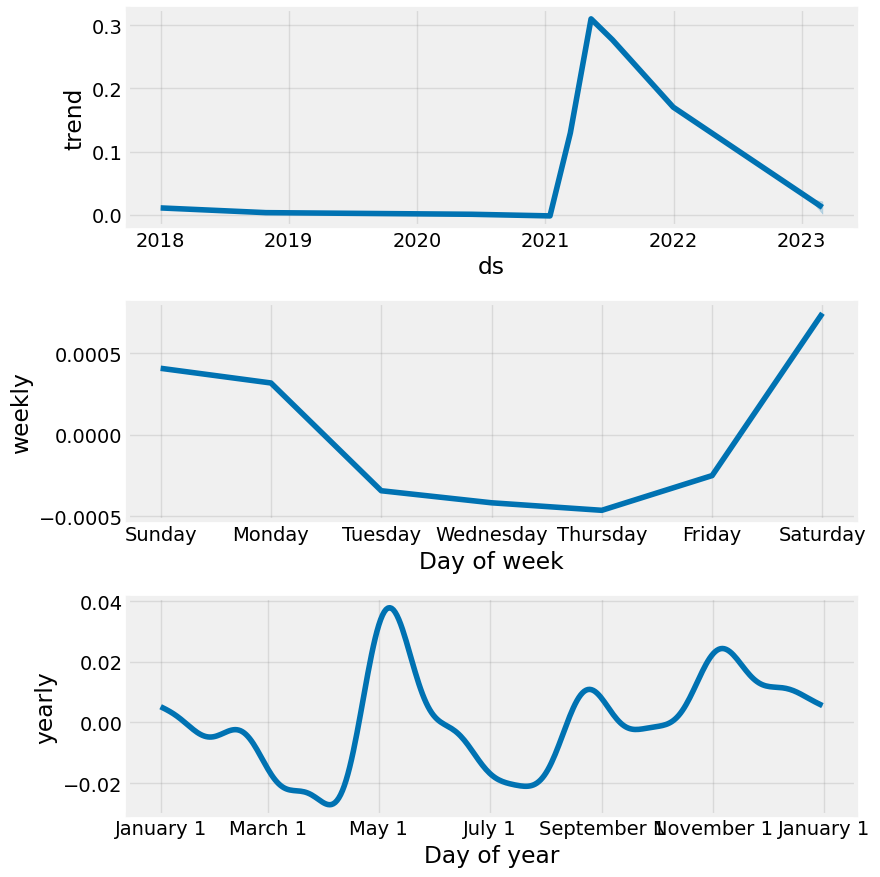

In [ ]:
fig_doge = model_doge.plot_components(prediction_doge)

In [ ]:
df_doge_cv = cross_validation(model_doge, horizon='60 days')

INFO:prophet:Making 47 forecasts with cutoffs between 2019-01-21 00:00:00 and 2022-11-01 00:00:00


  0%|          | 0/47 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/xtndb_mc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/weca63le.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75126', 'data', 'file=/tmp/tmp4078oezg/xtndb_mc.json', 'init=/tmp/tmp4078oezg/weca63le.json', 'output', 'file=/tmp/tmp4078oezg/prophet_model87dlqm16/prophet_model-20230417202726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/fqqnlchp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/89khyxla.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

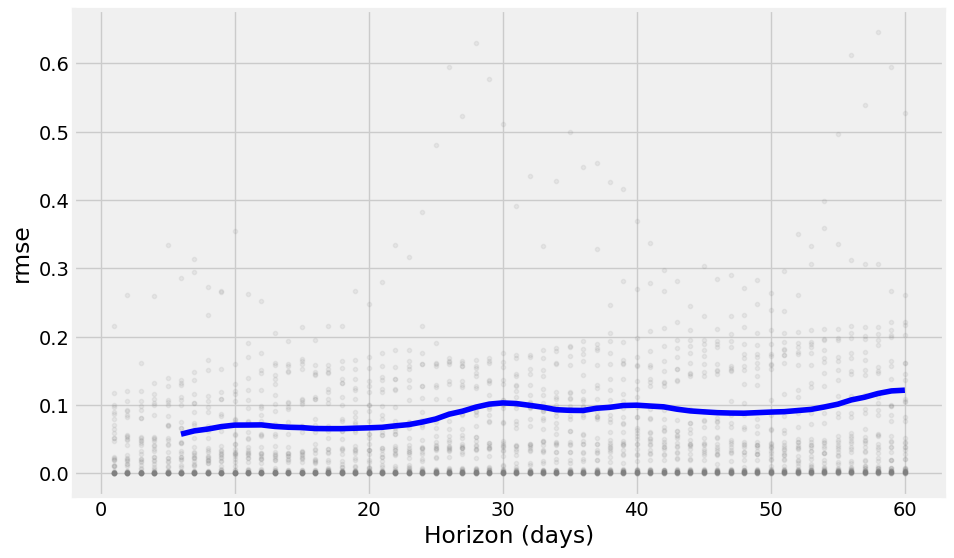

In [ ]:
fig2_doge = plot.plot_cross_validation_metric(df_doge_cv, metric = 'rmse')

In [ ]:
df_lite = select_Lite_usd[['Date','Open']]
df_lite.columns = ['ds','y']
model_lite = Prophet()
model_lite.fit(df_lite)
future_dates_lite = model_lite.make_future_dataframe(periods=60)
prediction_lite = model_lite.predict(future_dates_lite)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/ct2emua0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/78wck39d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62430', 'data', 'file=/tmp/tmp4078oezg/ct2emua0.json', 'init=/tmp/tmp4078oezg/78wck39d.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modelw2hfe6e1/prophet_model-20230417202750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model_lite,prediction_lite)

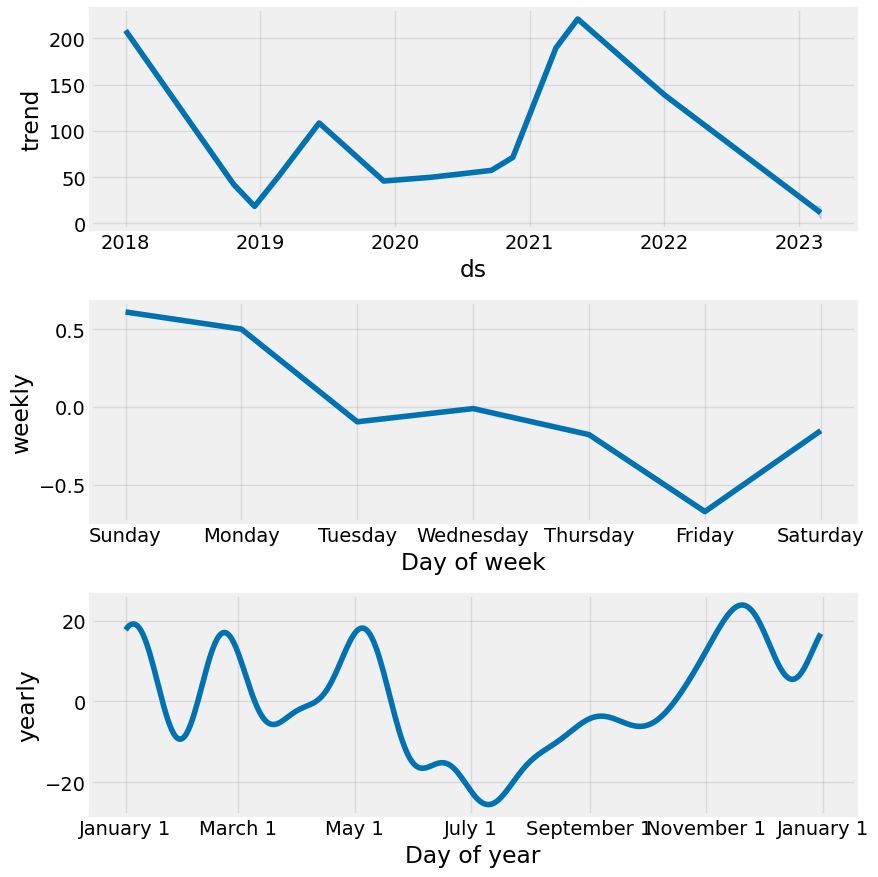

In [ ]:
fig_lite = model_lite.plot_components(prediction_lite)

In [ ]:
df_lite_cv = cross_validation(model_lite, horizon='60 days')

INFO:prophet:Making 47 forecasts with cutoffs between 2019-01-21 00:00:00 and 2022-11-01 00:00:00


  0%|          | 0/47 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/hwifog1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/9wxz8i5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47301', 'data', 'file=/tmp/tmp4078oezg/hwifog1n.json', 'init=/tmp/tmp4078oezg/9wxz8i5e.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modelxs_xpmne/prophet_model-20230417202752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/xrsgibhn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/px9lxym7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

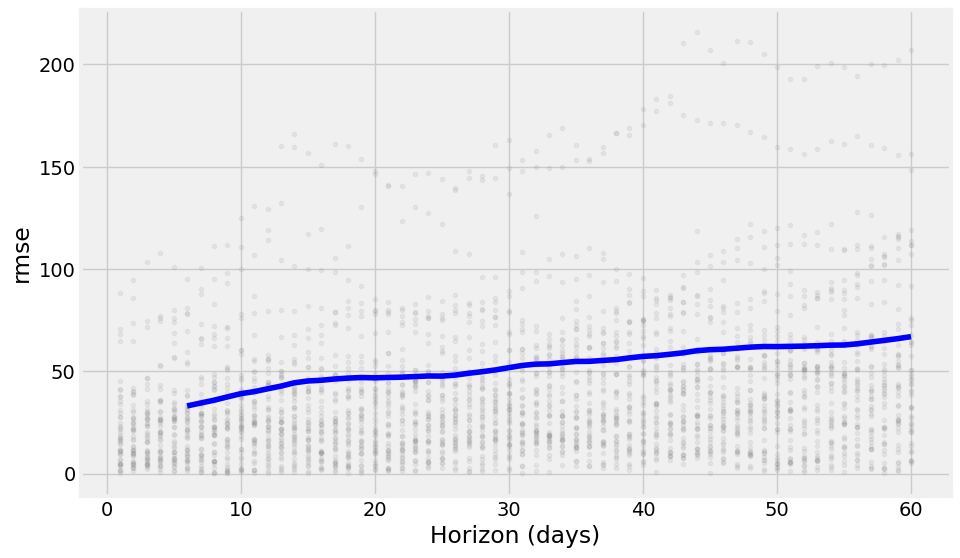

In [ ]:
fig2_lite = plot.plot_cross_validation_metric(df_lite_cv, metric = 'rmse')


In [ ]:
df_pol = select_Polkadot_usd[['Date','Open']]
df_pol.columns = ['ds','y']
model_pol = Prophet()
model_pol.fit(df_pol)
future_dates_pol = model_pol.make_future_dataframe(periods=60)
prediction_pol = model_pol.predict(future_dates_pol)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/syty43wj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/rldo2305.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66944', 'data', 'file=/tmp/tmp4078oezg/syty43wj.json', 'init=/tmp/tmp4078oezg/rldo2305.json', 'output', 'file=/tmp/tmp4078oezg/prophet_model28rsj9zd/prophet_model-20230417202821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:28:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:28:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model_pol,prediction_pol)

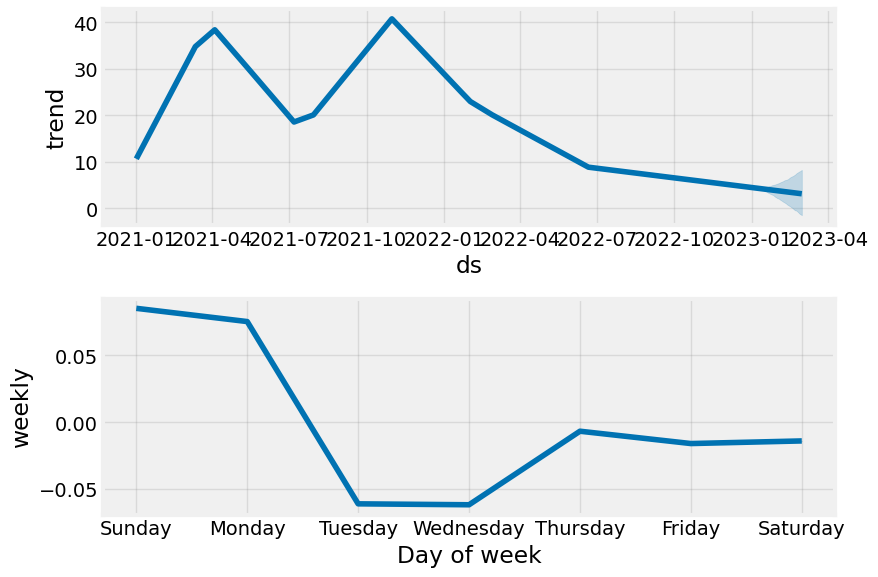

In [ ]:
fig_pol = model_pol.plot_components(prediction_pol)

In [ ]:
df_pol_cv = cross_validation(model_pol, horizon='60 days')

INFO:prophet:Making 17 forecasts with cutoffs between 2021-07-09 00:00:00 and 2022-11-01 00:00:00


  0%|          | 0/17 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/i4g1v522.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/0akd570y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55854', 'data', 'file=/tmp/tmp4078oezg/i4g1v522.json', 'init=/tmp/tmp4078oezg/0akd570y.json', 'output', 'file=/tmp/tmp4078oezg/prophet_model2knwcvlx/prophet_model-20230417202822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:28:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:28:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/vvl5gtfa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/4a74eu54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

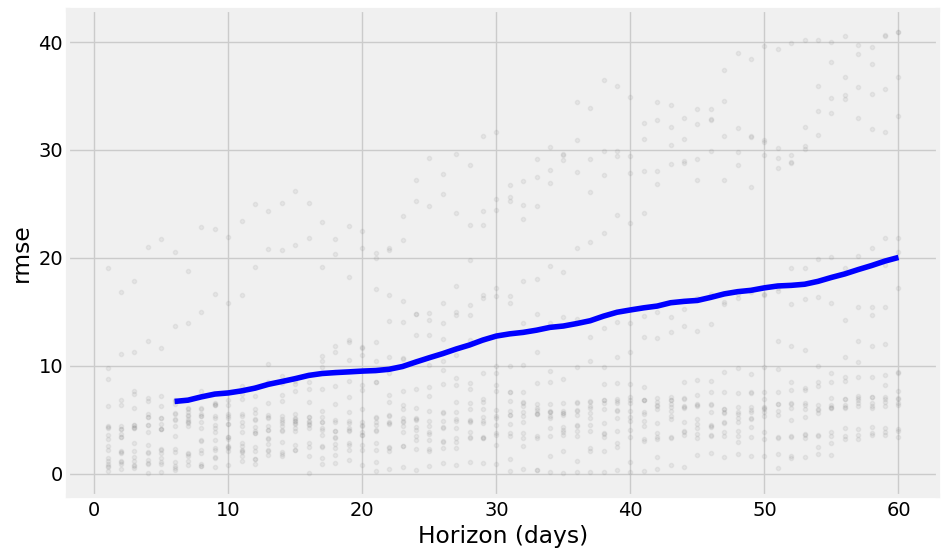

In [ ]:
fig2_pol = plot.plot_cross_validation_metric(df_pol_cv, metric = 'rmse')

In [ ]:
df_eur = select_Eur_usd[['Date','Open']]
df_eur.columns = ['ds','y']
model_eur = Prophet()
model_eur.fit(df_eur)
future_dates_eur = model_eur.make_future_dataframe(periods=60)
prediction_eur = model_eur.predict(future_dates_eur)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/pgn1xbma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/9ozqtclb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23963', 'data', 'file=/tmp/tmp4078oezg/pgn1xbma.json', 'init=/tmp/tmp4078oezg/9ozqtclb.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modeloq744__j/prophet_model-20230417202827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:28:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:28:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model_eur,prediction_eur)

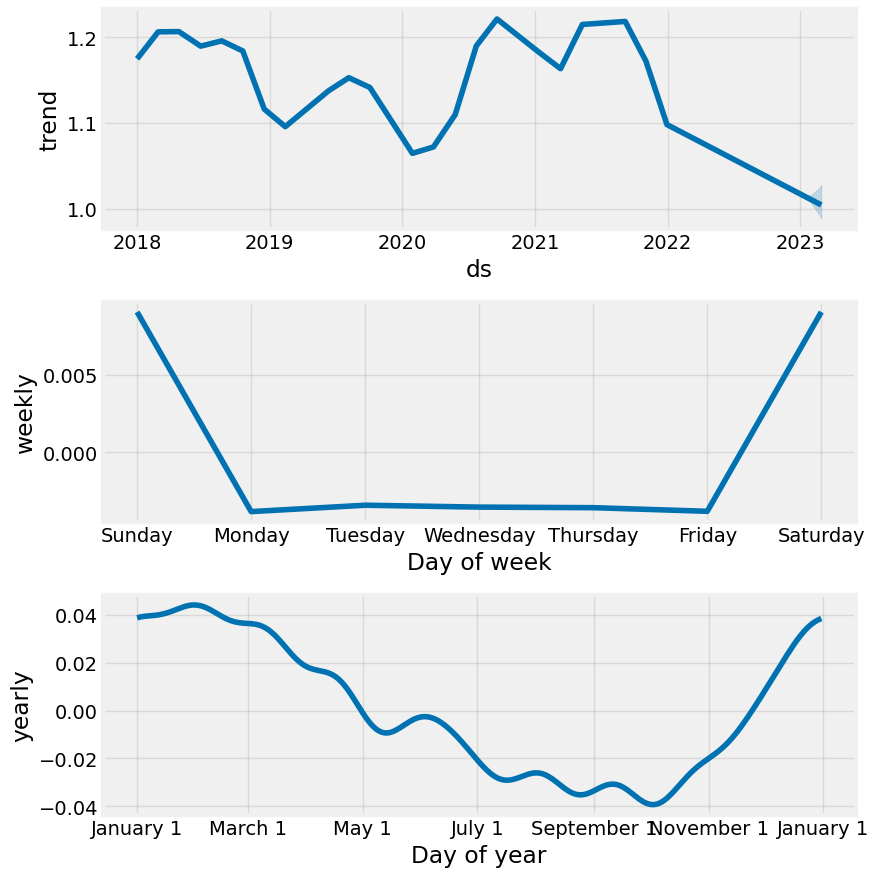

In [ ]:
fig_eur = model_eur.plot_components(prediction_eur)

In [ ]:
df_eur_cv = cross_validation(model_eur, horizon='60 days')


INFO:prophet:Making 47 forecasts with cutoffs between 2019-01-20 00:00:00 and 2022-10-31 00:00:00


  0%|          | 0/47 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/u7h_t9d4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/zv0keb98.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42048', 'data', 'file=/tmp/tmp4078oezg/u7h_t9d4.json', 'init=/tmp/tmp4078oezg/zv0keb98.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modelr3u54ofw/prophet_model-20230417202829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:28:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:28:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/roxkxh52.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/isd5tput.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

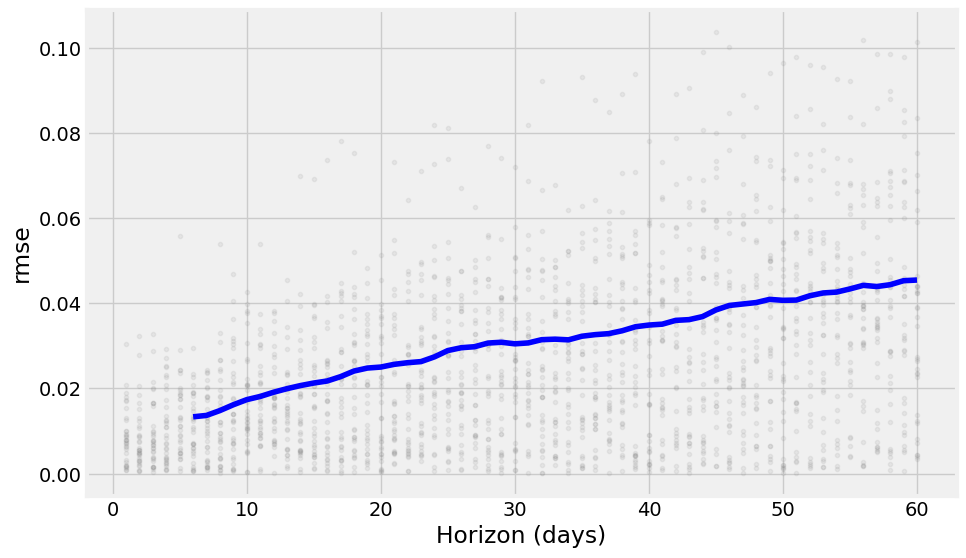

In [ ]:
fig2_eur = plot.plot_cross_validation_metric(df_eur_cv, metric = 'rmse')

In [ ]:
df_gbp = select_Gbp_usd[['Date','Open']]
df_gbp.columns = ['ds','y']
model_gbp = Prophet()
model_gbp.fit(df_gbp)
future_dates_gbp = model_gbp.make_future_dataframe(periods=60)
prediction_gbp = model_gbp.predict(future_dates_gbp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/1rt794hd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/0a3wlte2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91288', 'data', 'file=/tmp/tmp4078oezg/1rt794hd.json', 'init=/tmp/tmp4078oezg/0a3wlte2.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modela6p_kc5h/prophet_model-20230417202902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:29:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:29:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model_gbp,prediction_gbp)

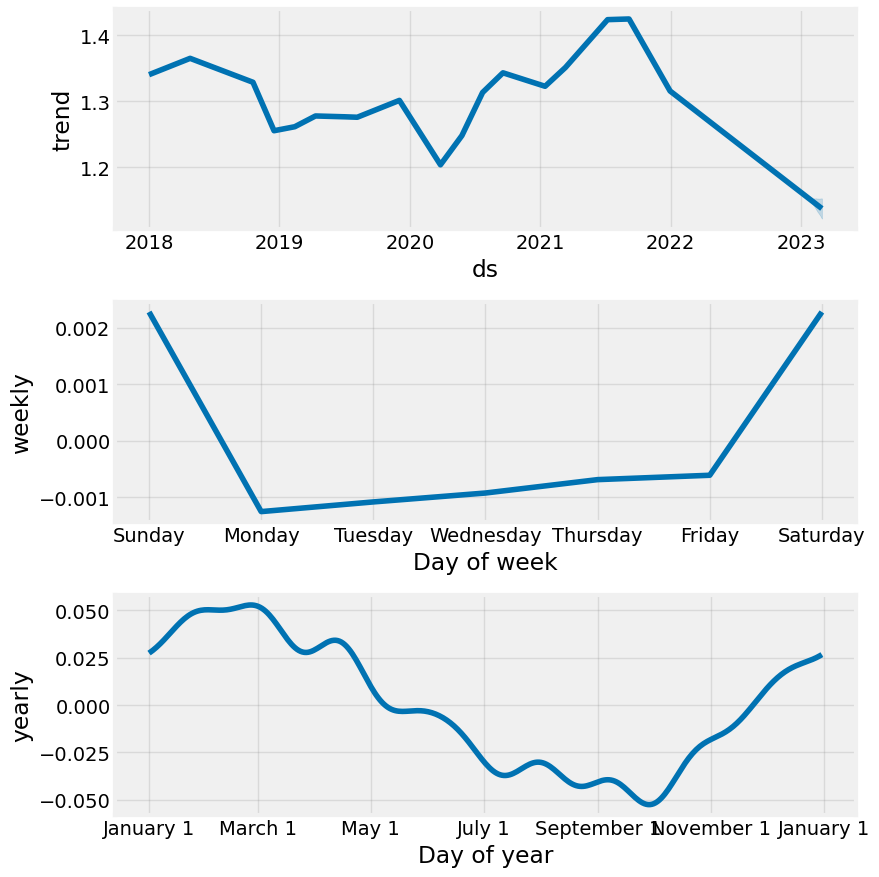

In [ ]:
fig_gbp = model_gbp.plot_components(prediction_gbp)


In [ ]:
df_gbp_cv = cross_validation(model_gbp, horizon='60 days')


INFO:prophet:Making 47 forecasts with cutoffs between 2019-01-20 00:00:00 and 2022-10-31 00:00:00


  0%|          | 0/47 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/e042u89e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/bx_9wopg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91622', 'data', 'file=/tmp/tmp4078oezg/e042u89e.json', 'init=/tmp/tmp4078oezg/bx_9wopg.json', 'output', 'file=/tmp/tmp4078oezg/prophet_modeltmcl32_c/prophet_model-20230417202905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:29:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:29:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/vt70ospl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4078oezg/00h8pvsd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

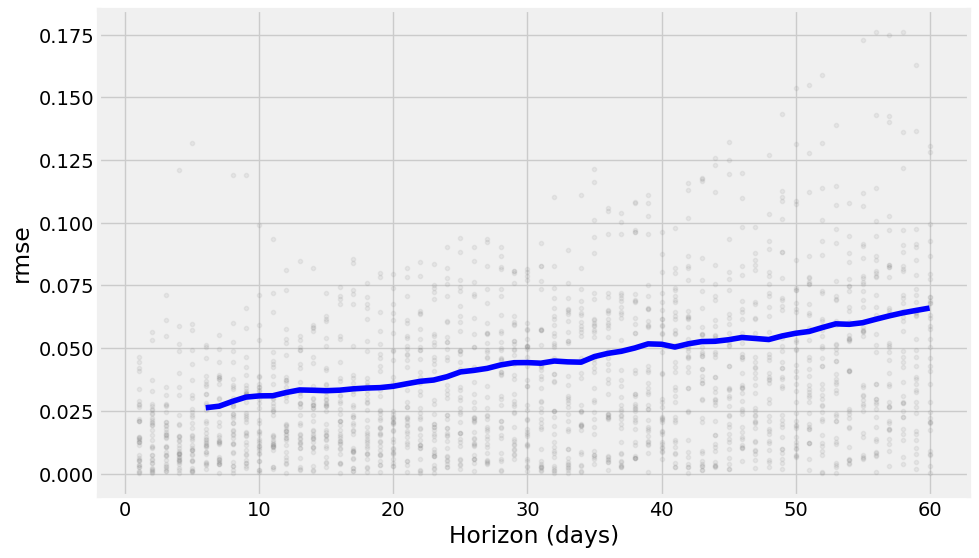

In [ ]:
fig2_gbp = plot.plot_cross_validation_metric(df_gbp_cv, metric = 'rmse')